<img src="https://i.imgur.com/3DNGAuE.jpg" alt="holii" style="width:100px;">



#####Importar librerias 

In [0]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from time import time
from scipy import signal
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import (corner_harris, corner_peaks, BRIEF)
!pip install progress
import progressbar, time

  Created wheel for progress: filename=progress-1.5-cp36-none-any.whl size=8074 sha256=5e04b3a2da6e4cc4531d6c3b79c05815ce68378db20ad4f9de2410f44ae8cfcf
  Stored in directory: /root/.cache/pip/wheels/6c/c8/80/32a294e3041f006c661838c05a411c7b7ffc60ff939d14e116
Successfully built progress


In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/proyecto_Visión_Inteligencia

Mounted at /content/drive
/content/drive/My Drive/proyecto_Visión_Inteligencia


#####Funciones creadas para una eficiencia en el desarrollo del notebook

In [0]:
#Crear etiquetas
def recortarSoloNombre(text):
  y = text.split('.')
  name = "".join([x for x in y[0] if x.isalpha()])
  return name

In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="accuracy", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

In [0]:
#Quitar duplicados y saber que clases tenemos
def elimanteDuplicated(list):
  lista_nueva = []
  for i in list:
    if i not in lista_nueva:
      lista_nueva.append(i)
  return lista_nueva

In [0]:
#Obtener el número de muestras que se tienen por cada clas
def obtenercantidadmuestras():
    y=[]
    X=[]
    lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/')
    for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)
    list_classes = elimanteDuplicated(y)     
    for classname in list_classes:
      count = 0
      for i in range(0,len(y)):
        if classname == y[i]:
          count += 1
      X.append([classname, count])
    return X , y 

In [0]:
#crear etiquetas
def soloclaseparaimg(text):
  y = text.split('.')
  return y[0]

In [0]:
def createData(r):
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  import cv2 as cv
  rutas_palabras = r
  nombres_palabras =os.listdir(rutas_palabras)
  nombres_palabras.sort()
  y = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  y.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza lara de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    y.append(recortarSoloNombre(nombres_palabras[i]))

  total.update(i)
  total.finish()
  X=np.array(X)
  return X , y

In [0]:
def esqueleto(img):
  from skimage.morphology import skeletonize
  from skimage import data
  import matplotlib.pyplot as plt
  from skimage.util import invert
  import cv2

  # Invert the horse image
  image = invert(img)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  skeleton = cv2.Canny(image,100,200)
  return skeleton

### **CREAR NUEVOS VÍDEOS**

In [0]:
#crear videos volteados
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
X = np.zeros((200,20))
lista.sort()
h = 0
j = 0
i = 0
y=[]
y_t = []
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  
print(list_classes)
for classname in list_classes[:10]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1
  print("count : ",  count)
  contador_r = contador_r + count 
for i in range (200):
  print(path+lista[i])
  u_list,v_list = flujo(path+lista[i])
  y_t.append(recortarSoloNombre(lista[i]))
  

print(y_t)

KeyboardInterrupt: ignored

In [0]:
#LEER EL VIDEO
def espejo(url,clase,count):
    V = cv.VideoCapture(url)
    frames = [V.read()[1] for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
    frames = np.array(frames)
    height, width = frames[1].shape[0],frames[1].shape[1]
    #ESPEJO
    for i in range (len(frames)):
      frames[i] = cv.flip(frames[i],1)
    #print(frames)
    #GUARDAR EL VIDEO
    out = cv.VideoWriter("/content/drive/My Drive/proyecto_Visión_Inteligencia/video/"+clase+str(count)+".mp4", cv.VideoWriter_fourcc('M','J','P','G'), 30, (width,height))
    for i in range(1,len(frames)):
      out.write(frames[i])
    out.release()
    return out

In [0]:
#crear videos volteados
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  
print(list_classes)
for classname in list_classes[:70]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1

  print("count : ",  count)

  
  contador_r = contador_r + count 

    
  for j in range(12-count):
          espejo(path+lista[h], recortarSoloNombre(lista[h]), count)
          print(path+lista[h], " ", recortarSoloNombre(lista[h]), " ", count)
          h = h+1
          count= count+1

  if(h<contador_r):
    h = contador_r
  



In [0]:
def trasladar(url,clase,count):
  #LEER EL VIDEO
  V = cv.VideoCapture(url)
  frames = [V.read()[1] for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.array(frames)
  height, width = frames[1].shape[0],frames[1].shape[1]
  #ESPEJO
  for i in range (len(frames)):
    height, width = frames[0].shape[:2] 
    quarter_height, quarter_width = height / 16, width / 16
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
    frames[i]=cv.warpAffine(frames[i], T, (width, height)) 
  #GUARDAR EL VIDEO
  out = cv.VideoWriter("/content/drive/My Drive/proyecto_Visión_Inteligencia/video/"+clase+str(count)+".mp4", cv.VideoWriter_fourcc('M','J','P','G'), 30, (width,height))
  for i in range(1,len(frames)):
    out.write(frames[i])
  out.release()
  return out

In [0]:
#crear videos volteados
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  
print(list_classes)
for classname in list_classes[:70]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1

  print("count : ",  count)

  
  contador_r = contador_r + count 

    
  for j in range(20-count):
          print(path+lista[h], " ", recortarSoloNombre(lista[h]), " ", count)
          trasladar(path+lista[h], recortarSoloNombre(lista[h]), count)
          
          h = h+1
          count= count+1

  if(h<contador_r):
    h = contador_r
  

In [0]:
def colores(url,clase,count):
  #LEER EL VIDEO
  import cv2 as cv
  import numpy as np
  V = cv.VideoCapture(url)
  frames =  [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  image = frames[0]
  
  # Store height and width of the image 
  height, width = image.shape[:2] 
    
  quarter_height, quarter_width = height / 16, width / 16
    
  T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
  #ESPEJO
  for i in range (len(frames)):
    
    b,g,r = cv.split(frames[0])
    img = cv.merge((r,g,b))
    plt.imshow(img)
    frames[i]=cv.warpAffine(frames[i], img, (width, height)) 
  #GUARDAR EL VIDEO
  out = cv.VideoWriter("/content/drive/My Drive/proyecto_Visión_Inteligencia/video/"+clase+str(count)+".mp4", cv.VideoWriter_fourcc('M','J','P','G'), 30, (width,height))
  for i in range(1,len(frames)):
    out.write(frames[i])
  out.release()
  return out

In [0]:
#crear videos volteados
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  
print(list_classes)
for classname in list_classes[:21]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1

  print("count : ",  count)

  
  contador_r = contador_r + count 

    
  for j in range(80-count):
          colores(path+lista[h], recortarSoloNombre(lista[h]), count)
          print(path+lista[h], " ", recortarSoloNombre(lista[h]), " ", count)
          h = h+1
          count= count+1

  if(h<contador_r):
    h = contador_r
  



In [0]:
def colores2(url,clase,count):
  #LEER EL VIDEO
  import cv2 as cv
  import numpy as np
  V = cv.VideoCapture(url)
  frames =  [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  image = frames[0]
  
  # Store height and width of the image 
  height, width = image.shape[:2] 
    
  quarter_height, quarter_width = height / 16, width / 16
    
  T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
  #ESPEJO
  for i in range (len(frames)):
    
    b,g,r = cv.split(frames[0])
    img = cv.merge((g,r,b))
    plt.imshow(img)
    frames[i]=cv.warpAffine(frames[i], img, (width, height)) 
  #GUARDAR EL VIDEO
  out = cv.VideoWriter("/content/drive/My Drive/proyecto_Visión_Inteligencia/video/"+clase+str(count)+".mp4", cv.VideoWriter_fourcc('M','J','P','G'), 30, (width,height))
  for i in range(1,len(frames)):
    out.write(frames[i])
  out.release()
  return out

In [0]:
#crear videos volteados
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  
print(list_classes)
for classname in list_classes[:21]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1

  print("count : ",  count)

  
  contador_r = contador_r + count 

    
  for j in range(80-count):
          colores2(path+lista[h], recortarSoloNombre(lista[h]), count)
          print(path+lista[h], " ", recortarSoloNombre(lista[h]), " ", count)
          h = h+1
          count= count+1

  if(h<contador_r):
    h = contador_r
  



In [0]:
def colores3(url,clase,count):
  #LEER EL VIDEO
  import cv2 as cv
  import numpy as np
  V = cv.VideoCapture(url)
  frames =  [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  image = frames[0]
  
  # Store height and width of the image 
  height, width = image.shape[:2] 
    
  quarter_height, quarter_width = height / 16, width / 16
    
  T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
  #ESPEJO
  for i in range (len(frames)):
    
    b,g,r = cv.split(frames[0])
    img = cv.merge((g,r,b))
    frames[i]=cv.warpAffine(img, T, (width, height)) 
  #GUARDAR EL VIDEO
  out = cv.VideoWriter("/content/drive/My Drive/proyecto_Visión_Inteligencia/video/"+clase+str(count)+".mp4", cv.VideoWriter_fourcc('M','J','P','G'), 30, (width,height))
  for i in range(1,len(frames)):
    out.write(frames[i])
  out.release()
  return out

In [0]:
#crear videos volteados
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  
print(list_classes)
for classname in list_classes[:21]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1

  print("count : ",  count)

  
  contador_r = contador_r + count 

    
  for j in range(80-count):
          colores3(path+lista[h], recortarSoloNombre(lista[h]), count)
          print(path+lista[h], " ", recortarSoloNombre(lista[h]), " ", count)
          h = h+1
          count= count+1

  if(h<contador_r):
    h = contador_r
  



### **DATASET**

In [0]:
#CUANTOS VÍDEOS HAY POR CLASE

path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()

i = 0
y=[]
contador_r = 0
for nombre in lista[:1672]:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  

for classname in list_classes[:1672]:
  count = 0
  for i in range(0,len(y)):
    if classname == y[i]:
#print(lista[i])
      count += 1
  print(count)
print(list_classes)


80
79
80
80
80
80
78
80
80
80
80
80
80
78
79
80
78
80
80
80
80
['a', 'abdomen', 'able', 'about', 'above', 'accept', 'accident', 'accomplish', 'accountant', 'across', 'action', 'active', 'activity', 'actor', 'add', 'address', 'adopt', 'adult', 'advantage', 'affect', 'afraid']


<img src="https://raw.githubusercontent.com/sofiat99/TSIGN/master/final_5e80c3d20736ba0015a45660_540504.gif" style="width:200px">

#**Tratamiendo de Imagenes**

### **BACKGROUND**

In [0]:
#leer videos .avi
import cv2 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def background(url,clase):
  newframes = []
  firts_frame = cv2.flip(frames_V1[0],1,cv2.COLOR_BGR2GRAY)
  for i in range(5,int(len(frames_V1))-1):
      
      
        frame = cv2.flip(frames_V1[i],1,cv2.COLOR_BGR2GRAY)
        
        blur = cv2.GaussianBlur(frame, (5, 5), 0)
        #grayscaled = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        dst = cv2.absdiff(firts_frame, blur) #funcion para quitar el fondo del frame
        img = cv2.resize(dst, (0,0), fx=0.75, fy=0.75)
        grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)# convertir la imagen a escala de grises
        _,thresh1 = cv2.threshold(grayscaled,20,255,cv2.THRESH_BINARY)
        newframes.append(thresh1)
        firts_frame = cv2.flip(frames_V1[i],1,cv2.COLOR_BGR2GRAY)
  bs = []
  for j in range(len(newframes)):
      if j == 0:
        bs.append(newframes[j])
      else:
        bs= bs + newframes[j]
  cv.imwrite('/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/'+clase+'.jpg',bs[0])
  return newframes

In [0]:
#crear videos volteados
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista2= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
y_t = []
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  
print(list_classes)
for classname in list_classes[:10]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1
  contador_r = contador_r + count 
for i in range (800):
  print(i)
  background(path+lista[i],soloclaseparaimg(lista[i]))
  y_t.append(recortarSoloNombre(lista[i]))
  

print(y_t)

In [0]:
def createData():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  ytra = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  ytra.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    ytra.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print(X)
  print(ytra)
  
  return X,ytra

In [0]:
X,y = createData()

100% (800 of 800) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 38. 54. 76.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 38. 54. 77.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 

In [0]:
xtrue = np.array(X)
xtrue = xtrue[:797]
ytrue = y[:-3]
ytrue = np.array(ytrue)
print(ytrue.shape)
print(xtrue.shape)

(797,)
(797, 10000)


acierto en train 0.7142857142857143
acierto en test  0.61875



cm_train
[[54  0  0  0  0  0  0  0  0  5]
 [11 51  0  0  0  0  0  0  0  1]
 [ 0  2 55  0  0  4  0  2  0  0]
 [ 7  0  0 40  1  1  4  0  2 12]
 [ 2  0  0  9 43  1  0  0  5  7]
 [ 1  0  8  5  0 45  2  0  3  2]
 [ 9  2  1  0  0  1 43  0  1  1]
 [ 0  0  3  0  0  5  3 53  0  0]
 [ 0  1  0  4  2  2 11  0 27 18]
 [ 7  0  0  9  2  0  2  0  1 44]]
cm_test
[[20  0  0  0  0  0  0  0  0  1]
 [ 6  9  0  0  0  0  0  0  0  1]
 [ 0  0 16  0  0  1  0  0  0  0]
 [ 1  0  0  6  1  0  1  0  1  3]
 [ 1  0  1  0  6  0  0  0  1  4]
 [ 0  0  3  0  0  9  0  0  0  2]
 [ 3  0  0  0  0  1  9  0  5  2]
 [ 0  0  2  0  0  2  2 10  0  0]
 [ 0  0  0  1  0  0  3  0  5  6]
 [ 1  0  0  1  1  0  0  0  3  9]]


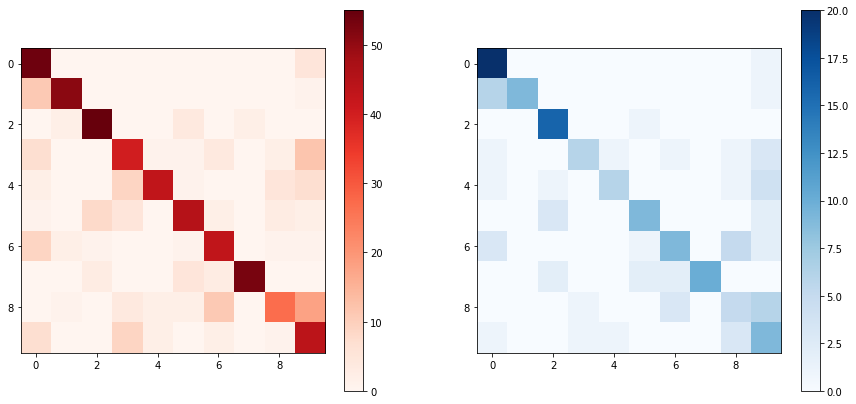

In [0]:
X=xtrue
y=ytrue
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
#neigh = GaussianNB()
#neigh = DecisionTreeClassifier()
neigh.fit(X_train, y_train)

accuaracy = neigh.score(X_test, y_test)
test = neigh.score(X_train, y_train)

from sklearn.metrics import confusion_matrix
predicciones_train = neigh.predict(X_train)
predicciones_test  = neigh.predict(X_test)

#print("train = ",neigh.score(X_train,y_train))
#print ("accuracy = ",accuaracy)
print ("acierto en train", neigh.score(X_train, y_train))
print ("acierto en test ", neigh.score(X_test, y_test))
print ("")
print("\n")
cm_train=confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print ("cm_train")
print (cm_train)
print ("cm_test")
print (cm_test)
plt.figure(figsize=(15,7))
plt.subplot(121), plt.imshow(cm_train, interpolation="nearest", cmap=plt.cm.Reds), plt.colorbar();
plt.subplot(122), plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues), plt.colorbar();

### **FLUJO ÓPTICO**

In [0]:
def optical_flow(I1g, I2g, window_size, tau=1e-2):
 
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])#*.25
    w = int(window_size/2) # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = I1g / 255. # normalize pixels
    I2g = I2g / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            b = np.reshape(It, (It.shape[0],1))  # get b here
            A =  np.vstack((Ix, Iy)).T  # get A here
            # if threshold τ is larger than the smallest eigenvalue of A'A:
            if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau:
                nu = np.matmul(np.linalg.pinv(A), b)
                u[i,j]=nu[0]
                v[i,j]=nu[1]
 
    return (u,v)

In [0]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from time import time
from scipy import signal

def optical_flow_function(url,clase):
  Video_1 = cv.VideoCapture(url)
  frames_V1 = [cv.resize(cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB),(100,100))
                for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]

  newframes = []
  u_move = []
  v_move = []

  blocksize = 5
  kernel_size = 3

  firts_frame = cv.flip(frames_V1[0],1,cv.COLOR_BGR2GRAY)
  frame1_blur = cv.GaussianBlur(firts_frame, (5, 5), 0)
  for i in range(int(len(frames_V1)/2)):
      
        #BACKGROUND SUBSTRACTION
        ###########################################################################
        frame = cv.flip(frames_V1[i *2 ],1,cv.COLOR_BGR2GRAY)
        #frame = cv2.flip(frame,1,cv2.COLOR_BGR2GRAY)
        blur = cv.GaussianBlur(frame, (5, 5), 0)
        #grayscaled = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        dst = cv.absdiff(frame1_blur, blur) #funcion para quitar el fondo del frame
        grayscaled = cv.cvtColor(dst,cv.COLOR_BGR2GRAY)# convertir la imagen a escala de grises
        _,thresh1 = cv.threshold(grayscaled,20,255,cv.THRESH_BINARY)
        newframes.append(thresh1)
        ###########################################################################

        #OPTICAL FLOW
        ###########################################################################
        #I3g = cv.cvtColor(blur, cv.COLOR_RGB2GRAY)
        #I4g = cv.cvtColor(frame1_blur, cv.COLOR_RGB2GRAY)
        img1 = esqueleto(blur)
        img2 = esqueleto(frame1_blur)

        #KEY POINTS
        #####################################################
        #I3g = cv.cornerHarris(I3g,blocksize,kernel_size,0.05)
        #I4g = cv.cornerHarris(I4g,blocksize,kernel_size,0.05)
        #####################################################

        u, v = optical_flow(img1, img2, window_size=10, tau=1e-2)
        u_move.append(u)
        v_move.append(v)
        #########################################################################3

        frame1_blur = cv.GaussianBlur(frame, (5, 5), 0)

      
  motion = []
  for j in range(len(newframes)):
      euclidean_distance = u_move[j]**2 + v_move[j]**2
      motion.append(euclidean_distance)
  
  cv.imwrite('/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes2/'+clase+'.jpg',sum(motion))
  return 1

In [0]:
#crear videos dataset
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
y_t = []
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  

for classname in list_classes[:10]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1
  print("count : ",  count)
  contador_r = contador_r + count 
for i in range (787):
  optical_flow_function(path+lista[i],soloclaseparaimg(lista[i]))
  y_t.append(recortarSoloNombre(lista[i]))

print(y_t)

count :  80
count :  79
count :  80
count :  80
count :  80
count :  80
count :  78
count :  80
count :  80
count :  80
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdom

In [0]:
def createData():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes2/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  ytra = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  ytra.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    ytra.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print(X)
  print(ytra)
  
  return X,ytra

In [0]:
X,y = createData()

100% (787 of 787) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'ab

train =  0.5866454689984102
accuracy =  0.4050632911392405


cm_train
[[57  2  0  0  0  0  0  4  2  0]
 [ 1 44 10  4  1  1  2  2  1  0]
 [ 1  2 49  4  1  2  0  2  2  2]
 [ 2  1  5 31  5 11  0  2  2  0]
 [ 0  0  6  2 35 13  0  8  0  2]
 [ 7  0  6  0  1 43  2  5  0  0]
 [ 7  2  7  1  4  9 31  1  1  1]
 [ 1  0  5  4  5  0  9 36  1  2]
 [10  3  3  3  7 10  4  2 22  0]
 [ 2  1  0  7  2  5 10  1  4 21]]
cm_test
[[9 2 1 0 0 0 0 0 3 0]
 [0 8 3 0 0 0 2 0 0 0]
 [0 1 8 1 2 0 0 1 2 0]
 [0 1 2 4 0 7 1 3 1 2]
 [0 0 2 3 4 3 0 2 0 0]
 [1 0 1 0 1 9 2 2 0 0]
 [3 0 1 0 1 2 6 0 1 0]
 [1 0 3 1 1 1 2 7 1 0]
 [1 0 0 4 2 4 1 1 3 0]
 [1 0 0 1 0 3 5 0 1 6]]


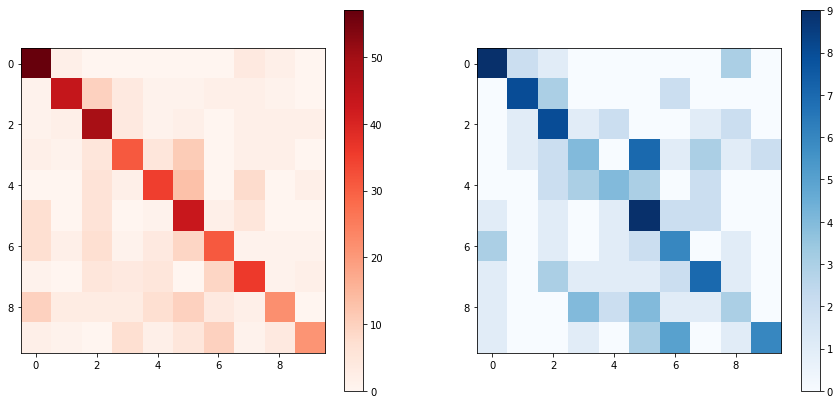

In [0]:
X=X
y=np.array(y)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
#neigh = GaussianNB()
#neigh = DecisionTreeClassifier()
neigh.fit(X_train, y_train)

accuaracy = neigh.score(X_test, y_test)
test = neigh.score(X_train, y_train)

from sklearn.metrics import confusion_matrix
predicciones_train = neigh.predict(X_train)
predicciones_test  = neigh.predict(X_test)

print("train = ",neigh.score(X_train,y_train))
print ("accuracy = ",accuaracy)
print("\n")
cm_train=confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print ("cm_train")
print (cm_train)
print ("cm_test")
print (cm_test)
plt.figure(figsize=(15,7))
plt.subplot(121), plt.imshow(cm_train, interpolation="nearest", cmap=plt.cm.Reds), plt.colorbar();
plt.subplot(122), plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues), plt.colorbar();

### **BORDES CON FLUJO ÓPTICO**

In [0]:
def optflow(url,clase):
  import cv2 
  import os
  import sys
  import numpy as np
  import matplotlib.pyplot as plt
  from ipywidgets import interact, interactive, fixed, interact_manual
  import ipywidgets as widgets
  Video_1 = cv.VideoCapture(url)
  frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
              for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]

  newframes = []
  u_move = []
  v_move = []
  I4g = []
  blocksize = 5
  kernel_size = 3
  keypoints = []

  firts_frame = cv.flip(frames_V1[0],1,cv.COLOR_BGR2GRAY)
  frame1_blur = cv.GaussianBlur(firts_frame, (5, 5), 0)
  for i in range(4,int(len(frames_V1))):
      
        #BACKGROUND SUBSTRACTION
        ###########################################################################
        frame = cv.flip(frames_V1[i],1,cv.COLOR_BGR2GRAY)
        #frame = cv.flip(frame,1,cv2.COLOR_BGR2GRAY)
        blur = cv.GaussianBlur(frame, (5, 5), 0)
        #grayscaled = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        dst = cv.absdiff(frame1_blur, blur) #funcion para quitar el fondo del frame
        grayscaled = cv.cvtColor(dst,cv.COLOR_BGR2GRAY)# convertir la imagen a escala de grises
        _,thresh1 = cv.threshold(grayscaled,20,255,cv.THRESH_BINARY)
        newframes.append(thresh1)
        ###########################################################################

        #OPTICAL FLOW
        ###########################################################################
        #I3g = cv.cvtColor(grayscaled, cv.COLOR_RGB2GRAY)
        #I4g = cv.cvtColor(firts_frame, cv.COLOR_RGB2GRAY)

        #KEY POINTS
        #####################################################
        i = 2
        j = 11
        k = 4
        #I3g = cv.cornerHarris(grayscaled,blocksize, 3, 3, 0.00001)
        I4g.append(cv.cornerHarris(thresh1,blocksize, 3, 3, 0.00001))
        #####################################################


  for i in range(len(I4g)-1):
    flow = cv.calcOpticalFlowFarneback(I4g[i], I4g[i+1], None,
    pyr_scale=0.5, levels=3, winsize=15, iterations=3,
    poly_n=5, poly_sigma=1.2, flags=0)
    u = flow[:,:,0]
    v = flow[:,:,1]
    u_move.append(u)
    v_move.append(v)
  motion= []
  for j in range(len(u_move)):

    euclidean_distance = u_move[j]**2 + v_move[j]**2
    motion.append(euclidean_distance)
  imagen = sum(motion)
  frame_normed = 255 * (imagen - imagen.min()) / (imagen.max() - imagen.min())
  np.array(frame_normed, np.int)
  cv.imwrite('/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes/'+clase+'.jpg',frame_normed)
  #########################################################################3
  
  return plt.imshow(imagen)

count :  77
count :  78
count :  80
count :  80
count :  80
count :  80
count :  78
count :  80
count :  80
count :  80


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen'

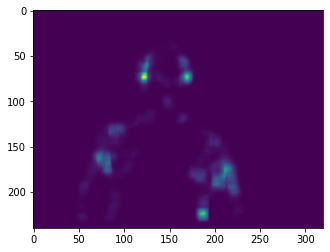

In [0]:
#crear videos dataset
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
y_t = []
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  

for classname in list_classes[:10]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1
  print("count : ",  count)
  contador_r = contador_r + count 
for i in range (800):
  optflow(path+lista[i],soloclaseparaimg(lista[i]))
  y_t.append(recortarSoloNombre(lista[i]))

print(y_t)

In [0]:
def createData():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  ytra = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  ytra.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    ytra.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print(X)
  print(ytra)
  
  return X,ytra

In [0]:
x,y_tr = createData()

100% (800 of 800) |######################| Elapsed Time: 0:03:09 Time:  0:03:09


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 38. 54. 76.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 38. 54. 77.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 

train =  0.715625
accuracy =  0.55625


cm_train
[[60  0  0  0  0  0  0  0  0  1  0]
 [18 47  0  0  0  0  0  0  0  0  0]
 [ 2  2 55  0  0  3  0  0  0  0  0]
 [14  0  0 31  1  0  4  0  4  9  0]
 [ 5  0  0  8 35  1  0  0  6  8  0]
 [ 2  0  4  2  0 55  2  0  4  1  0]
 [ 8  1  1  2  0  1 38  1  7  2  0]
 [ 0  0  2  0  0  6  4 54  0  0  0]
 [ 1  0  0  0  1  3  7  0 40 16  0]
 [ 4  0  0  8  0  1  1  0  2 43  0]
 [ 0  0  2  0  0  0  0  0  0  0  0]]
cm_test
[[19  0  0  0  0  0  0  0  0  0  0]
 [ 4 10  0  0  0  0  0  0  0  0  0]
 [ 0  1 15  0  0  2  0  0  0  0  0]
 [ 6  0  0  7  0  1  0  0  1  2  0]
 [ 3  1  0  1  3  2  1  0  2  4  0]
 [ 0  0  2  0  0  7  0  0  1  0  0]
 [ 4  1  0  1  0  1  5  0  5  0  0]
 [ 0  0  3  0  0  1  1  9  0  0  0]
 [ 0  0  0  1  0  0  0  0  4  7  0]
 [ 4  0  0  3  1  1  0  0  2 10  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]]


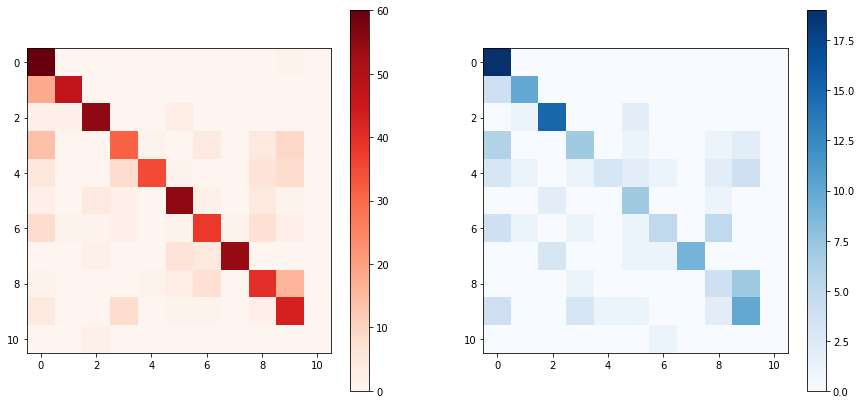

In [0]:
X=x
y=np.array(y_tr)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
#neigh = GaussianNB()
#neigh = DecisionTreeClassifier()
neigh.fit(X_train, y_train)

accuaracy = neigh.score(X_test, y_test)
test = neigh.score(X_train, y_train)

from sklearn.metrics import confusion_matrix
predicciones_train = neigh.predict(X_train)
predicciones_test  = neigh.predict(X_test)

print("train = ",neigh.score(X_train,y_train))
print ("accuracy = ",accuaracy)
print("\n")
cm_train=confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print ("cm_train")
print (cm_train)
print ("cm_test")
print (cm_test)
plt.figure(figsize=(15,7))
plt.subplot(121), plt.imshow(cm_train, interpolation="nearest", cmap=plt.cm.Reds), plt.colorbar();
plt.subplot(122), plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues), plt.colorbar();

### **BORDES CON CORNER HARRIS**

In [0]:
def cornerHarris(url,clase):
  import cv2 
  import os
  import sys
  import numpy as np
  import matplotlib.pyplot as plt
  from ipywidgets import interact, interactive, fixed, interact_manual
  import ipywidgets as widgets
  Video_1 = cv.VideoCapture(url)
  frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
              for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]

  newframes = []
  u_move = []
  v_move = []
  I4g = []
  I5g = []
  blocksize = 5
  kernel_size = 3
  keypoints = []
  orb = cv2.ORB_create(nfeatures=1500)

  firts_frame = cv.flip(frames_V1[0],1,cv.COLOR_BGR2GRAY)
  frame1_blur = cv.GaussianBlur(firts_frame, (5, 5), 0)
  for i in range(2,int(len(frames_V1))):
      
        #BACKGROUND SUBSTRACTION
        ###########################################################################
        frame = cv.flip(frames_V1[i],1,cv.COLOR_BGR2GRAY)
        #frame = cv.flip(frame,1,cv2.COLOR_BGR2GRAY)
        blur = cv.GaussianBlur(frame, (5, 5), 0)
        #grayscaled = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        dst = cv.absdiff(frame1_blur, blur) #funcion para quitar el fondo del frame
        grayscaled = cv.cvtColor(dst,cv.COLOR_BGR2GRAY)# convertir la imagen a escala de grises
        _,thresh1 = cv.threshold(grayscaled,20,255,cv.THRESH_BINARY)
        newframes.append(thresh1)
        ###########################################################################

        #KEY POINTS
        #####################################################
        i = 2
        j = 11
        k = 4
        I4g.append(cv.cornerHarris(thresh1,blocksize, 3, 3, 0.00001))
        #####################################################
  imagen = sum(I4g)
  blur = cv2.GaussianBlur(imagen, (5, 5), 0)
  frame_normed = 255 * (blur - blur.min()) / (blur.max() - blur.min())
  np.array(frame_normed, np.int)
  cv.imwrite('/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes4/'+clase+'.jpg',frame_normed)
  #########################################################################3
  return plt.imshow(blur)

count :  77
count :  78
count :  80
count :  80
count :  80
count :  80
count :  78
count :  80
count :  80
count :  80


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen'

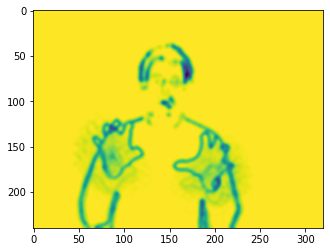

In [0]:
#crear videos dataset
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
y_t = []
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  

for classname in list_classes[:10]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1
  print("count : ",  count)
  contador_r = contador_r + count 
for i in range (800):
  cornerHarris(path+lista[i],soloclaseparaimg(lista[i]))
  y_t.append(recortarSoloNombre(lista[i]))

print(y_t)

In [0]:
def createData():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes4/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  ytra = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  ytra.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    ytra.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print(X)
  print(y)
  
  return X,ytra

In [0]:
x,y = createData()

100% (773 of 773) |######################| Elapsed Time: 0:00:09 Time:  0:00:09


[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', '

train =  0.7424460431654676
accuracy =  0.38461538461538464


cm_train
[[41  0  0  2  1  1  1  1  0  0  0]
 [ 2 61  0  0  3  1  7  0  0  0  0]
 [ 0  0 62  2  1  1  1  2  2  0  0]
 [ 1  1  3 51  2  4  5  1  2  2  0]
 [ 2  0  2  1 47  2  6  2  2  0  0]
 [ 0  1  2  0  3 64  5  1  0  0  0]
 [ 1  3  2  4  1  5 52  0  0  0  0]
 [ 2  3  4  1  1  2  2 49  4  5  0]
 [ 0  1  1  3  0  3  9  6 43  7  0]
 [ 2  0  3  2  1  4 11  2  2 44  0]
 [ 0  0  2  1  0  0  0  0  1  0  2]]
cm_test
[[1 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 1 0 2 0 0 0 0]
 [1 0 4 0 1 0 0 1 1 1 0]
 [0 1 2 1 1 1 0 1 0 1 0]
 [1 0 0 1 7 1 3 2 1 0 0]
 [0 0 0 0 1 2 1 0 0 0 0]
 [1 1 0 1 0 0 7 0 0 0 0]
 [0 1 1 1 0 2 0 0 1 1 0]
 [0 0 0 0 0 0 3 0 2 2 0]
 [0 0 1 0 1 0 2 0 0 5 0]
 [0 0 0 0 0 0 0 1 0 0 0]]


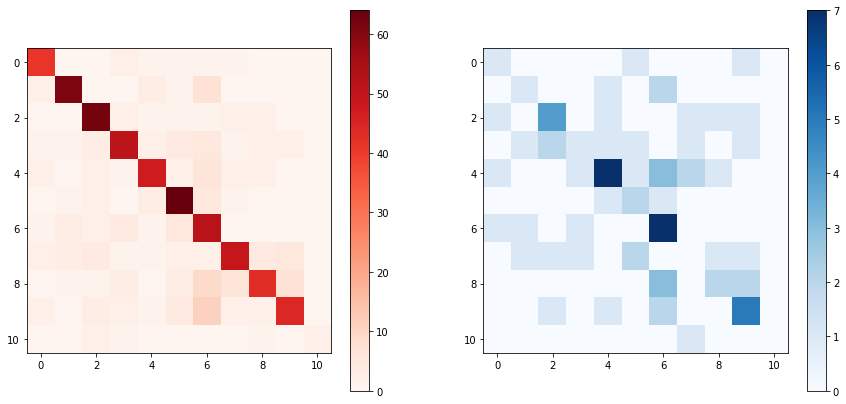

In [0]:
X=x
y=np.array(y)
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
#neigh = GaussianNB()
#neigh = DecisionTreeClassifier()
neigh.fit(X_train, y_train)

accuaracy = neigh.score(X_test, y_test)
test = neigh.score(X_train, y_train)

from sklearn.metrics import confusion_matrix
predicciones_train = neigh.predict(X_train)
predicciones_test  = neigh.predict(X_test)

print("train = ",neigh.score(X_train,y_train))
print ("accuracy = ",accuaracy)
print("\n")
cm_train=confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print ("cm_train")
print (cm_train)
print ("cm_test")
print (cm_test)
plt.figure(figsize=(15,7))
plt.subplot(121), plt.imshow(cm_train, interpolation="nearest", cmap=plt.cm.Reds), plt.colorbar();
plt.subplot(122), plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues), plt.colorbar();

### **BOW**

In [0]:
def createData():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  ytra = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  ytra.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    ytra.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print(X)
  print(ytra)
  
  return X,ytra

In [0]:
X, y = createData()

100% (800 of 800) |######################| Elapsed Time: 0:00:12 Time:  0:00:12


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 38. 54. 76.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 38. 54. 77.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 

In [0]:
import gc
array_BOW=[]
rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/"
nombres_palabras = os.listdir(rutas_palabras)
nombres_palabras.sort()
img = cv.imread(rutas_palabras+nombres_palabras[0],0)
img=rgb2gray(img)
keypoints = corner_peaks(corner_harris(img), min_distance=1)
extractor = BRIEF(patch_size=5)
extractor.extract(img, keypoints)
array_BOW = extractor.descriptors*1

total = progressbar.ProgressBar(maxval=len(nombres_palabras))
total.start()
total.update(0)
for i in range(1,len(nombres_palabras)):
    img=cv.imread(rutas_palabras+nombres_palabras[i],0)
    keypoints = corner_peaks(corner_harris(img), min_distance=1)
    extractor = BRIEF(patch_size=5)
    extractor.extract(img, keypoints)
    array_BOW=np.concatenate((array_BOW,extractor.descriptors*1))
    total.update(i)


array_BOW=np.array(array_BOW)

gc.collect() # explicitelly clean memory

print (array_BOW.shape)

 99% (799 of 800) |##################### | Elapsed Time: 0:02:13 ETA:   0:00:00

(353191, 256)


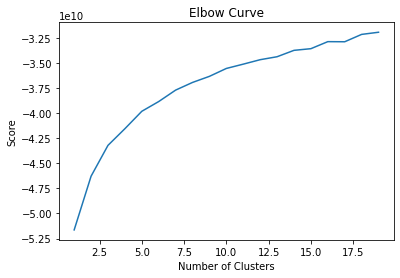

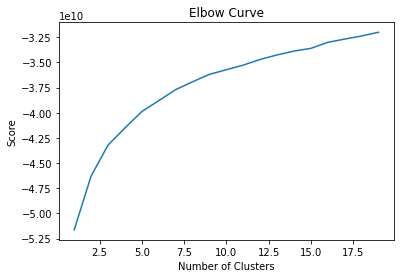

In [0]:
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [0]:
from sklearn.cluster import KMeans
v_words = 120
kmeans = KMeans(n_clusters=v_words).fit(array_BOW)

In [0]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [0]:
import gc

arr_h_train=[]
arr_h_test=[]
ya_train=[]
ya_test=[]

total = progressbar.ProgressBar(maxval=len(nombres_palabras))
total.start()
for i in range(len(nombres_palabras)):
    try:
        #img=rgb2gray(x_train[i])
        img = rgb2gray(cv.imread(rutas_palabras+nombres_palabras[i],0))
        keypoints = corner_peaks(corner_harris(img), min_distance=1)
        extractor = BRIEF(patch_size=5)
        extractor.extract(img, keypoints)
        arr_h_train.append(build_histogram(extractor.descriptors*1,kmeans))
        ya_train.append(y[i])
    except ValueError:
        continue
    total.update(i)



print (np.array(arr_h_train).shape, np.array(ya_train).shape)

 99% (798 of 800) |##################### | Elapsed Time: 0:01:16 ETA:   0:00:00

(799, 120) (799,)


In [0]:
X=np.array(arr_h_train)
X.shape

(799, 120)

train =  0.8247261345852895


accuracy =  0.80625


cm_train
[[67  0  0  1  0  0  0  0  0  1  0]
 [ 3 57  0  0  1  1  0  1  0  0  0]
 [ 3  4 56  0  0  0  0  0  0  1  0]
 [ 1  9  0 44  3  3  2  0  1  0  0]
 [ 0  3  0  2 43  0  1  2  5  0  0]
 [ 1  2  1  1  2 58  1  0  0  0  0]
 [ 0  2  0  2  1  3 52  1  1  0  0]
 [ 0  4  0  2  2  0  2 55  0  2  0]
 [ 7  4  0  0  4  0  1  1 45  1  0]
 [ 1  8  0  1  2  0  0  0  2 50  0]
 [ 1  0  0  0  0  1  0  0  0  0  0]]
cm_test
[[ 8  0  0  0  0  0  0  0  0  2  0]
 [ 0 15  0  0  0  0  0  1  0  0  0]
 [ 0  1 13  1  0  1  0  0  0  0  0]
 [ 0  3  0 14  0  0  0  0  0  0  0]
 [ 1  1  0  2 17  0  0  2  1  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  3  0  0 12  1  0  0  0]
 [ 0  1  0  0  1  0  1  9  0  1  0]
 [ 1  1  1  0  0  0  0  0 13  1  0]
 [ 0  0  1  0  1  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]]


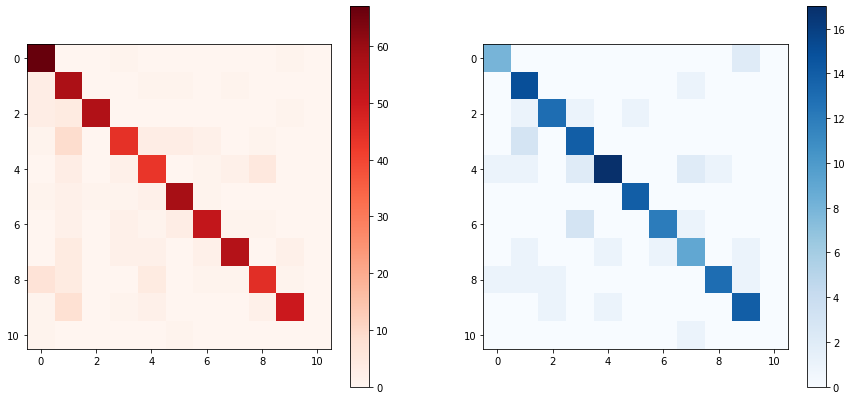

In [0]:
X=np.array(arr_h_train)
y=np.array(ya_train)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
#rango.append(i)
accuaracy = neigh.score(X_test, y_test)
test = neigh.score(X_train, y_train)

from sklearn.metrics import confusion_matrix
predicciones_train = neigh.predict(X_train)
predicciones_test  = neigh.predict(X_test)
#prediccion_time = time() - start_time
print("train = ",neigh.score(X_train,y_train))
print("\n")
print ("accuracy = ",accuaracy)
print("\n")
cm_train=confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print ("cm_train")
print (cm_train)
print ("cm_test")
print (cm_test)
plt.figure(figsize=(15,7))
plt.subplot(121), plt.imshow(cm_train, interpolation="nearest", cmap=plt.cm.Reds), plt.colorbar();
plt.subplot(122), plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues), plt.colorbar();

In [0]:
import pandas as pd
data = pd.DataFrame(X,y)

In [0]:
data.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
a,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
abdomen,1.0,1.0,1.0,1.0,4.0,3.0,1.0,2.0,0.0,3.0,1.0,5.0,0.0,1.0,0.0,5.0,6.0,0.0,1.0,3.0,1.0,1.0,0.0,3.0,0.0,0.0,3.0,2.0,3.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,7.0,0.0,1.0,...,0.0,1.0,0.0,2.0,3.0,0.0,0.0,4.0,0.0,2.0,3.0,1.0,2.0,2.0,1.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0
abdomen,5.0,7.0,5.0,5.0,13.0,16.0,5.0,4.0,2.0,6.0,11.0,2.0,6.0,7.0,7.0,10.0,14.0,5.0,6.0,18.0,6.0,2.0,0.0,11.0,5.0,4.0,5.0,6.0,7.0,5.0,6.0,3.0,5.0,7.0,11.0,7.0,8.0,9.0,2.0,12.0,...,1.0,2.0,2.0,3.0,2.0,6.0,4.0,5.0,5.0,4.0,7.0,6.0,1.0,0.0,1.0,0.0,8.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,4.0,1.0,1.0,0.0,6.0,5.0,0.0,3.0,10.0,3.0,3.0,1.0,3.0,2.0,2.0,7.0
abdomen,3.0,1.0,2.0,0.0,4.0,3.0,1.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0,3.0,2.0,4.0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0,3.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,5.0,2.0,1.0,2.0,0.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0
abdomen,2.0,2.0,2.0,1.0,4.0,1.0,3.0,1.0,0.0,3.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,5.0,4.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0


In [0]:
data.to_csv('dataBOW.csv')
!cp data.csv "/content/drive/My Drive/proyecto_Visión_Inteligencia"

cp: 'data.csv' and '/content/drive/My Drive/proyecto_Visión_Inteligencia/data.csv' are the same file


In [0]:
import pandas as pd 
data2 = pd.read_csv("/content/drive/My Drive/proyecto_Visión_Inteligencia/dataBOW.csv", header=0, delimiter = ';')

In [0]:
data2.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,a,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,a,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,a,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **HISTOGRAMAS POLARES**


In [0]:
def histo(url):
  Video_1 = cv.VideoCapture(url)
  frames_V1 = [cv.resize(cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB),(100,100))
                for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]
  histograma = []
  angle_bins = 20
  for i in range(len(frames_V1)-1):
    img1 = esqueleto(frames_V1[i])
    img2 = esqueleto(frames_V1[i + 1])
    u,v = optical_flow(img1,img2, window_size=10,  tau=1e-2)
    mag, angle = cv.cartToPolar(u, v, angleInDegrees=True)
    
    #print(np.min(np.min(angle)),np.max(np.max(angle)), angle.shape)
    hist_np,bins_np = np.histogram(angle.ravel(),angle_bins,[0,360],weights=mag.ravel())
    hist_np = hist_np /np.sum(hist_np)
    histograma.append(hist_np)

  return sum(histograma)/len(frames_V1)

In [0]:
#crear videos dataset
import progressbar, time
import pickle
import cv2
path = '/content/drive/My Drive/proyecto_Visión_Inteligencia/video/'
lista= os.listdir('/content/drive/My Drive/proyecto_Visión_Inteligencia/video/')
lista.sort()
h = 0
j = 0
i = 0
y=[]
y_t = []
contador_r = 0
for nombre in lista:
      name = recortarSoloNombre(nombre)
      y.append(name)

list_classes = elimanteDuplicated(y)  

for classname in list_classes[:10]:
  count = 0
  
  for i in range(0,len(y)):
    if classname == y[i]:
      count += 1
  print("count : ",  count)
  contador_r = contador_r + count 
print(path+lista[0])
histogramas = histo(path+lista[0])
histog = histo(path+lista[0])
total = progressbar.ProgressBar(maxval=800) #Barra de progreso 
total.start()
total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
for i in range (800):
  histogramas = np.vstack((histogramas,histo(path+lista[i])))
  y_t.append(recortarSoloNombre(lista[i]))
  total.update(i)
  f = open('vector_X', 'wb')
  pickle.dump(histogramas, f)
  f = open('vector_Y', 'wb')
  pickle.dump(y_t, f)


f.close()
total.finish()
print(y_t)

In [0]:
import pandas as pd
df = pd.DataFrame(histogramas[:-1],y_t)

In [0]:
df.to_csv('data.csv')
!cp data.csv "/content/drive/My Drive/proyecto_Visión_Inteligencia"

In [0]:
import pandas as pd 
data = pd.read_csv("/content/drive/My Drive/proyecto_Visión_Inteligencia/datacompleto.csv", header=0, delimiter = ';')

In [0]:
data.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,a,0.059620,0.018541,0.020913,0.029944,0.090132,0.145309,0.046739,0.031773,0.022163,0.036864,0.065421,0.017257,0.020813,0.026515,0.077418,0.137531,0.038389,0.028311,0.025172,0.052165
1,a,0.059620,0.018541,0.020913,0.029944,0.090132,0.145309,0.046739,0.031773,0.022163,0.036864,0.065421,0.017257,0.020813,0.026515,0.077418,0.137531,0.038389,0.028311,0.025172,0.052165
2,a,0.025438,0.010557,0.015638,0.025689,0.111581,0.195938,0.044319,0.031963,0.018854,0.017689,0.033790,0.012354,0.017016,0.026727,0.148224,0.156799,0.027687,0.021246,0.015633,0.014287
3,a,0.056796,0.018770,0.022920,0.029080,0.095590,0.143183,0.048171,0.031903,0.022524,0.036659,0.068459,0.018370,0.020330,0.026467,0.079278,0.130436,0.036189,0.028054,0.023612,0.054661
4,a,0.026628,0.010355,0.016784,0.027147,0.113176,0.198865,0.042970,0.033229,0.021006,0.021936,0.037523,0.013343,0.017580,0.027347,0.140754,0.148585,0.027376,0.019190,0.016486,0.015329
5,a,0.061143,0.021050,0.031899,0.050384,0.106577,0.126728,0.030986,0.022268,0.020115,0.034010,0.075119,0.022609,0.027303,0.036697,0.091523,0.116869,0.026554,0.019978,0.019119,0.050736
6,a,0.033692,0.017849,0.030875,0.041680,0.142730,0.175638,0.026772,0.017609,0.010442,0.012535,0.028556,0.015813,0.017414,0.025486,0.097777,0.207849,0.025074,0.016831,0.013520,0.019131
7,a,0.026089,0.017850,0.027080,0.038832,0.096112,0.184979,0.048429,0.042720,0.033739,0.028257,0.048692,0.021094,0.027662,0.033119,0.086449,0.130746,0.033979,0.024644,0.018099,0.018271
8,a,0.020666,0.016799,0.025354,0.034503,0.085921,0.212277,0.053834,0.040320,0.028944,0.022806,0.045383,0.021207,0.029612,0.032254,0.087066,0.136217,0.038177,0.025712,0.014833,0.014416
9,a,0.021297,0.010659,0.009990,0.009830,0.014750,0.119380,0.037921,0.046605,0.057098,0.052417,0.071725,0.051030,0.060571,0.070408,0.117902,0.111292,0.021934,0.027280,0.018384,0.016897


In [0]:
x2 = data.iloc[:,1:]
y2 = data.iloc[:,0]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2, y2, random_state=0)

train =  0.9977728285077951
accuracy =  0.8866666666666667




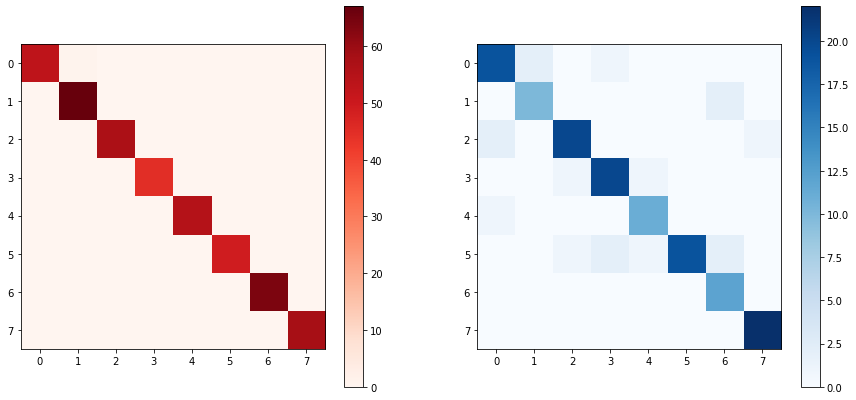

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KN_est = estSVC=SVC(kernel='poly',degree=8) #RandomForestClassifier(n_estimators=400, max_depth=100, random_state=0)
KN_est.fit(X_train, y_train)
KN_pr = KN_est.predict(X_test)
test_score = KN_est.score(X_test, y_test)
cm_test = confusion_matrix(y_test, KN_pr) 

predicciones_train = KN_est.predict(X_train)

cm_train = confusion_matrix(y_train, predicciones_train)

print("train = ",KN_est.score(X_train,y_train))
print ("accuracy = ",test_score)
print("\n")

plt.figure(figsize=(15,7))
plt.subplot(121), plt.imshow(cm_train, interpolation="nearest", cmap=plt.cm.Reds), plt.colorbar();
plt.subplot(122), plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues), plt.colorbar();

#**Inteligencia Artificial**  

Esta sección realiza los diferentes métodos usados para la clasificación de los datos obtenidos anteriormente en donde se hace uso de clasificadores y redes neuronales, se especifica con un titulo a que tratamiento se le hace la clasificación

##Clasificadores

###imagenes_1 : BACKGROUND SUBSTRACTION

In [0]:
X, y = createData("/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/")
print(X)
print(y)

100% (800 of 800) |######################| Elapsed Time: 0:00:09 Time:  0:00:09


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 38. 54. 76.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 38. 54. 77.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 

Codigo para hallar el mejor K

El numero K con el mejor accuracy es: 1


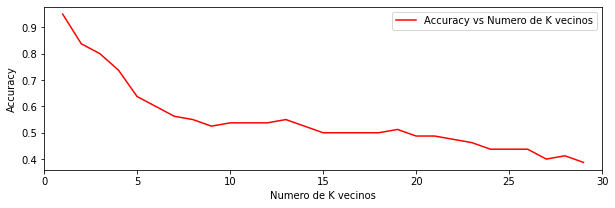

In [0]:
#codigo para hallar el mejor K
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
x=[]
y=[]
maxi=0;
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    x.append(i)
    score=neigh.score(X_test,y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print ("El numero K con el mejor accuracy es:",ma)
num=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#X = PCA(n_components=150).fit_transform(X)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB()
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=500, max_depth=15, random_state=0)
estSVC=SVC(kernel='linear')
estK=KNeighborsClassifier(n_neighbors=ma)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))


accuracy NB 0.581 (+/- 0.06281)
accuracy DT 0.812 (+/- 0.03260)
accuracy RF 0.885 (+/- 0.02610)
accuracy SVC 0.879 (+/- 0.03064)
accuracy KNeighbors 0.883 (+/- 0.04301)


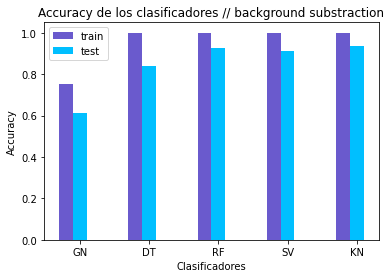

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // background substraction");
plt.legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


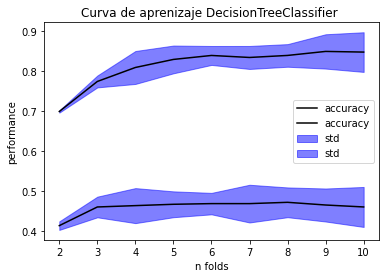

In [0]:
plt.title("Curva de aprenizaje GaussianNB");
show_curve(GaussianNB())



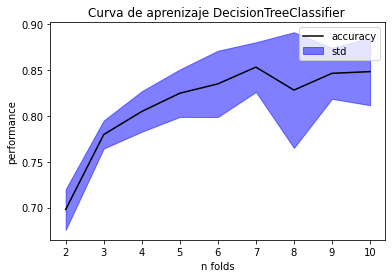

In [0]:
plt.title("Curva de aprenizaje DecisionTreeClassifier ");
show_curve(DecisionTreeClassifier())


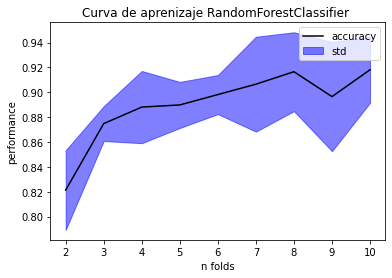

In [0]:
plt.title("Curva de aprenizaje RandomForestClassifier ");
show_curve(RandomForestClassifier())

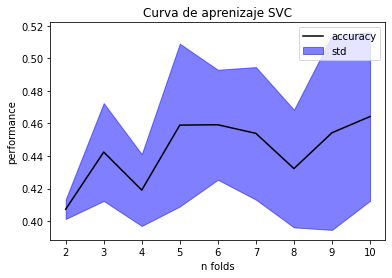

In [0]:
plt.title("Curva de aprenizaje SVC");
show_curve(SVC())

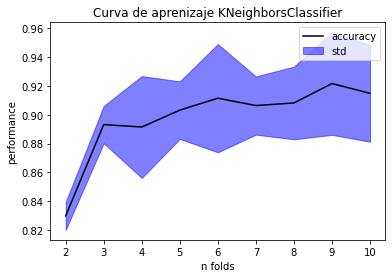

In [0]:
plt.title("Curva de aprenizaje KNeighborsClassifier");
show_curve(KNeighborsClassifier(n_neighbors=1))

######Utilizando PCA

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X = PCA(n_components=150).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB()
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=500, max_depth=15, random_state=0)
estSVC=SVC(kernel='linear')
estK=KNeighborsClassifier(n_neighbors=ma)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))

accuracy NB 0.730 (+/- 0.05280)
accuracy DT 0.841 (+/- 0.04577)
accuracy RF 0.895 (+/- 0.03758)
accuracy SVC 0.895 (+/- 0.03021)
accuracy KNeighbors 0.863 (+/- 0.04031)


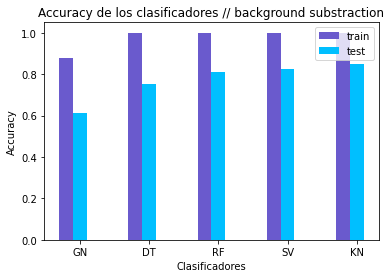

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // background substraction");
plt.legend();
plt.show();

###imagenes_2 : FLUJO ÓPTICO

In [0]:
X, y = createData("/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes2/")
print(X)
print(y)

100% (787 of 787) |######################| Elapsed Time: 0:03:34 Time:  0:03:34


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'ab

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#X = PCA(n_components=150).fit_transform(X)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB()
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=500, max_depth=15, random_state=0)
estSVC=SVC(kernel='linear')
estK=KNeighborsClassifier(n_neighbors=7)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))


accuracy NB 0.480 (+/- 0.06585)
accuracy DT 0.778 (+/- 0.04361)
accuracy RF 0.872 (+/- 0.02534)
accuracy SVC 0.836 (+/- 0.04239)
accuracy KNeighbors 0.436 (+/- 0.06564)


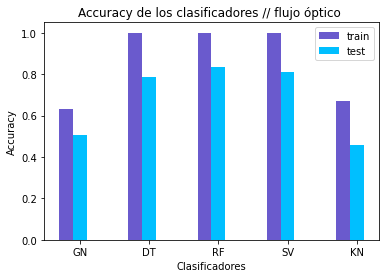

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // flujo óptico ");
plt.legend();
plt.show();

###imagenes_3 : BORDES CON FLUJO ÓPTICO

In [0]:
X, y = createData("/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes3/")
print(X)
print(y)

100% (796 of 796) |######################| Elapsed Time: 0:02:33 Time:  0:02:33


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdo

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#X = PCA(n_components=150).fit_transform(X)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB()
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=500, max_depth=15, random_state=0)
estSVC=SVC(kernel='linear')
estK=KNeighborsClassifier(n_neighbors=7)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))

accuracy NB 0.603 (+/- 0.04519)
accuracy DT 0.761 (+/- 0.02972)
accuracy RF 0.815 (+/- 0.04474)
accuracy SVC 0.832 (+/- 0.04426)
accuracy KNeighbors 0.323 (+/- 0.04673)


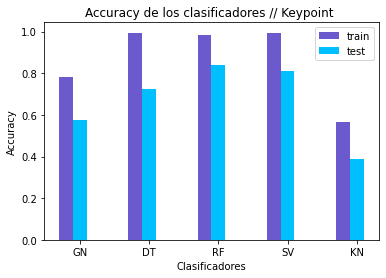

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // Keypoint ");
plt.legend();
plt.show();

###imagenes_4 : BORDES CON CORNER HARRIS

In [0]:
X, y = createData("/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes4/")
print(X)
print(y)

100% (773 of 773) |######################| Elapsed Time: 0:03:05 Time:  0:03:05


[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abd

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#X = PCA(n_components=150).fit_transform(X)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB()
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=500, max_depth=15, random_state=0)
estSVC=SVC(kernel='linear')
estK=KNeighborsClassifier(n_neighbors=7)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))

accuracy NB 0.332 (+/- 0.04842)
accuracy DT 0.801 (+/- 0.04713)
accuracy RF 0.871 (+/- 0.02269)
accuracy SVC 0.856 (+/- 0.04572)
accuracy KNeighbors 0.384 (+/- 0.03014)


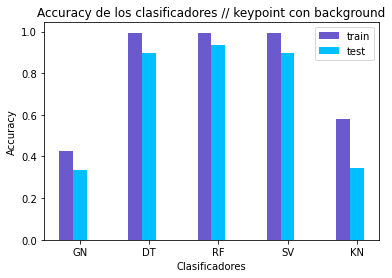

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // keypoint con background");
plt.legend();
plt.show();

###imagenes_5 : BACKGROUND SUBSTRACION SIN USO DE TRESHOLD

In [0]:
X, y = createData("/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes5/")
print(X)
print(y)

100% (566 of 566) |######################| Elapsed Time: 0:03:10 Time:  0:03:10


[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'accept', 'acc

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#X = PCA(n_components=150).fit_transform(X)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB()
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=500, max_depth=15, random_state=0)
estSVC=SVC(kernel='linear')
estK=KNeighborsClassifier(n_neighbors=7)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))

accuracy NB 0.261 (+/- 0.03511)
accuracy DT 0.306 (+/- 0.03286)
accuracy RF 0.500 (+/- 0.04707)
accuracy SVC 0.452 (+/- 0.06866)
accuracy KNeighbors 0.187 (+/- 0.04457)


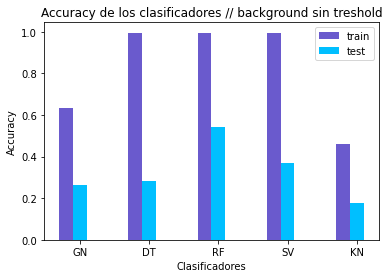

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // background sin treshold");
plt.legend();
plt.show();

###DATASET CART POLAR

In [0]:
import pandas as pd
d = pd.read_csv("/content/drive/My Drive/proyecto_Visión_Inteligencia/datacompleto.csv", header=0, delimiter = ';')
X = d.values[:,1:]
y = d.values[:,0]
y = np.array(y)

Codigo para hallar el mejor K

El numero K con el mejor accuracy es: 1


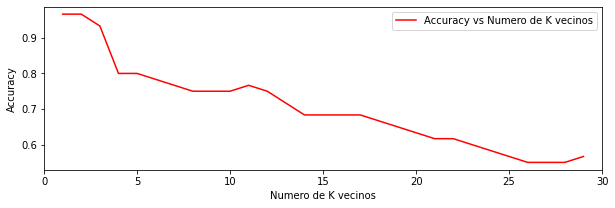

In [0]:
#codigo para hallar el mejor K
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
x=[]
y=[]
maxi=0;
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    x.append(i)
    score=neigh.score(X_test,y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print ("El numero K con el mejor accuracy es:",ma)
num=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#X = PCA(n_components=150).fit_transform(X)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB(priors=None,var_smoothing=1e-2)
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=100, max_depth=19, random_state=0)
estSVC=SVC(kernel='poly',degree=7)
estK=KNeighborsClassifier(n_neighbors=ma)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))

accuracy NB 0.452 (+/- 0.04924)
accuracy DT 0.835 (+/- 0.05306)
accuracy RF 0.906 (+/- 0.03828)
accuracy SVC 0.883 (+/- 0.03317)
accuracy KNeighbors 0.911 (+/- 0.04032)


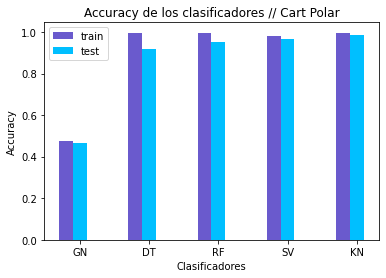

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // Cart Polar");
plt.legend();
plt.show();

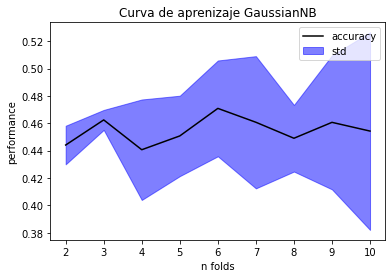

In [0]:
plt.title("Curva de aprenizaje GaussianNB");
show_curve(GaussianNB())

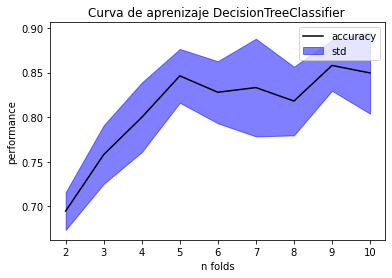

In [0]:
plt.title("Curva de aprenizaje DecisionTreeClassifier ");
show_curve(DecisionTreeClassifier())

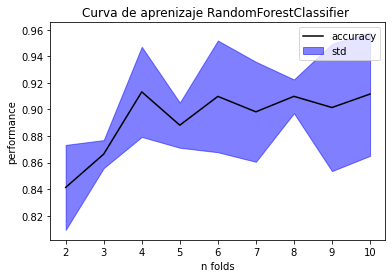

In [0]:
plt.title("Curva de aprenizaje RandomForestClassifier ");
show_curve(RandomForestClassifier())

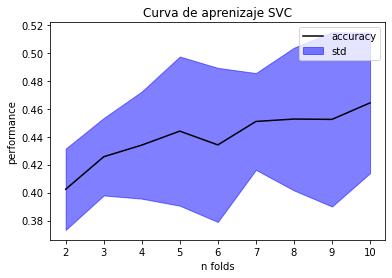

In [0]:
plt.title("Curva de aprenizaje SVC");
show_curve(SVC())

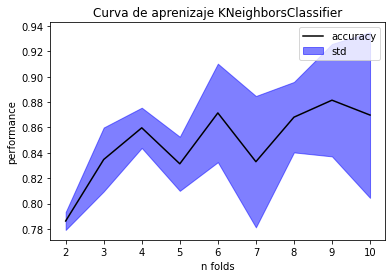

In [0]:
plt.title("Curva de aprenizaje KNeighborsClassifier");
show_curve(KNeighborsClassifier(n_neighbors=2))

###DATASET BOW

In [0]:
import pandas as pd
d = pd.read_csv("/content/drive/My Drive/proyecto_Visión_Inteligencia/dataBOW.csv", header=0, delimiter = ';')
X = d.values[:,1:]
y = d.values[:,0]

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#X = PCA(n_components=150).fit_transform(X)
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)
estGB=GaussianNB()
estDT=DecisionTreeClassifier()
estRF=RandomForestClassifier(n_estimators=500, max_depth=15, random_state=0)
estSVC=SVC(kernel='poly',degree=5)
estK=KNeighborsClassifier(n_neighbors=7)
estG=GradientBoostingClassifier(learning_rate=0.01,random_state=41)

estGB.fit(X_train, y_train)
estDT.fit(X_train, y_train)
estRF.fit(X_train, y_train)
estSVC.fit(X_train, y_train)
estK.fit(X_train, y_train)
#estG.fit(X_train, y_train)



score_GB = cross_val_score(estGB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_DT = cross_val_score(estDT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_RF = cross_val_score(estRF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_SVC = cross_val_score(estSVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
score_K = cross_val_score(estK, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#score_G = cross_val_score(estG, X1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))


print ("accuracy NB %.3f (+/- %.5f)"%(np.mean(score_GB), np.std(score_GB)))
print ("accuracy DT %.3f (+/- %.5f)"%(np.mean(score_DT), np.std(score_DT)))
print ("accuracy RF %.3f (+/- %.5f)"%(np.mean(score_RF), np.std(score_RF)))
print ("accuracy SVC %.3f (+/- %.5f)"%(np.mean(score_SVC), np.std(score_SVC)))
print ("accuracy KNeighbors %.3f (+/- %.5f)"%(np.mean(score_K), np.std(score_K)))
#print ("accuracy gradiente %.3f (+/- %.5f)"%(np.mean(score_G), np.std(score_G)))

accuracy NB 0.318 (+/- 0.04128)
accuracy DT 0.748 (+/- 0.02682)
accuracy RF 0.849 (+/- 0.05215)
accuracy SVC 0.404 (+/- 0.05541)
accuracy KNeighbors 0.601 (+/- 0.04919)


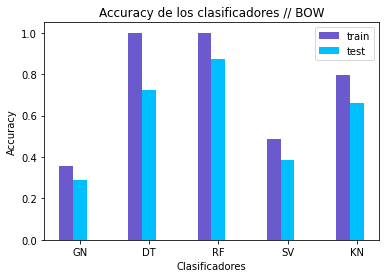

In [0]:
train=[estGB.score(X_train, y_train), estDT.score(X_train, y_train), 
      estRF.score(X_train, y_train), estSVC.score(X_train, y_train), 
      estK.score(X_train, y_train)]

test=[estGB.score(X_test, y_test), estDT.score(X_test, y_test), 
      estRF.score(X_test, y_test), estSVC.score(X_test, y_test), 
      estK.score(X_test, y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores // BOW");
plt.legend();
plt.show();

##Redes neuronales

###Redes neuronales convolucionales

####imagenes_1 : BACKGROUND SUBSTRACTION

In [0]:
def createData():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes1/" #Directorio imagenes método Background Substraction
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  y = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  y.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    y.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print("X = ", X)
  print("")
  print("y = ",y)

  return X , y

In [0]:
X, y = createData() #obtenemos nuestros datos de la carpeta imagenes1 es decir las imagenes procesadas mediante el método background Substraction
print(X)
print("")
print(y)

100% (800 of 800) |######################| Elapsed Time: 0:00:10 Time:  0:00:10


X =  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 38. 54. 76.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 38. 54. 77.]]

y =  ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 

Como nuestras redes neuronales no reciben un vector y de "Strings" entonces se realiza el reemplazo asigando dependiendo de la seña un valor numerico para una nueva representación donde la red neuronal pueda ejecutar.

In [0]:
print(X.shape)
print(y.shape)
X = X[:-3]
print(X.shape)

(800, 10000)
(797,)
(797, 10000)


In [0]:
#reemplazar las 29 clases por valores del 1 al 29
y = np.array(y[:797])
new_df = y.astype('str')
new_df[new_df == "a"] = 1
new_df[new_df == "abdomen"] = 2
new_df[new_df == "able"] = 3
new_df[new_df == "about"] = 4
new_df[new_df == "above"] = 5
new_df[new_df == "accept"] = 6
new_df[new_df == "accident"] = 7
new_df[new_df == "accomplish"] = 8
new_df[new_df == "accountant"] = 9
new_df[new_df == "across"] = 10
new_df[new_df == "action"] = 11
new_df[new_df == "active"] = 12
new_df[new_df == "activity"] = 13
new_df[new_df == "actor"] = 14
new_df[new_df == "add"] = 15
new_df[new_df == "address"] = 16
new_df[new_df == "adopt"] = 17
new_df[new_df == "adult"] = 18
new_df[new_df == "advantage"] = 19
new_df[new_df == "affect"] = 20
new_df[new_df == "afraid"] = 21
new_df[new_df == "africa"] = 22
new_df[new_df == "after"] = 23
new_df[new_df == "afternoon"] = 24
new_df[new_df == "again"] = 25
new_df[new_df == "against"] = 26
new_df[new_df == "age"] = 27
new_df[new_df == "agenda"] = 28
new_df[new_df == "ago"] = 29
print(new_df)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4

In [0]:
from keras.utils import to_categorical
encoded = to_categorical(new_df)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.2,random_state=42)

X_train = X_train.reshape([-1, 100, 100, 1])
X_test = X_test.reshape([-1, 100, 100, 1])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train, X_test, y_train, y_test = np.array(X_train),np.array(X_test), np.array(y_train), np.array(y_test)



print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])
print('Number of images in y_train', y_train.shape[0])
print('Number of images in y_test', y_test.shape[0])

x_train shape: (637, 100, 100, 1)
Number of images in x_train 637
Number of images in x_test 160
Number of images in y_train 637
Number of images in y_test 160


In [0]:
SebasCNN = tf.keras.models.Sequential()                                      

SebasCNN.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(100, 100, 1))) 
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Flatten())
SebasCNN.add(tf.keras.layers.Dense(128, activation='relu'))
SebasCNN.add(tf.keras.layers.Dense(11, activation='softmax'))

SebasCNN.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 96, 96, 64)        1664      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.99)
SebasCNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = SebasCNN.fit(X_train, y_train, epochs=100, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 0s 24ms/step - loss: 2.3750 - accuracy: 0.1224 - val_loss: 2.3371 - val_accuracy: 0.1250
Epoch 2/100
20/20 [==============================] - 0s 19ms/step - loss: 2.2199 - accuracy: 0.1805 - val_loss: 2.1494 - val_accuracy: 0.2125
Epoch 3/100
20/20 [==============================] - 0s 19ms/step - loss: 1.7807 - accuracy: 0.3485 - val_loss: 1.9755 - val_accuracy: 0.3438
Epoch 4/100
20/20 [==============================] - 0s 19ms/step - loss: 1.7567 - accuracy: 0.4772 - val_loss: 1.9110 - val_accuracy: 0.4000
Epoch 5/100
20/20 [==============================] - 0s 19ms/step - loss: 1.7682 - accuracy: 0.4160 - val_loss: 1.8675 - val_accuracy: 0.4125
Epoch 6/100
20/20 [==============================] - 0s 19ms/step - loss: 1.4510 - accuracy: 0.5196 - val_loss: 1.6899 - val_accuracy: 0.4938
Epoch 7/100
20/20 [==============================] - 0s 19ms/step - loss: 1.1806 - accuracy: 0.6217 - val_loss: 1.5895 - val_accuracy: 0.4688
Epoch 

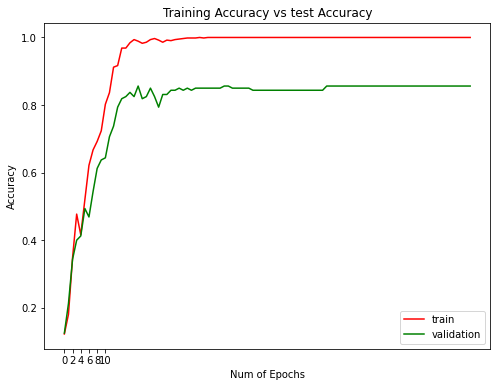

In [0]:
 plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####imagenes_2 : FLUJO ÓPTICO

In [0]:
def createData2():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes2/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  y = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  y.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    y.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print("X = ", X)
  print("")
  print("y = ",y)

  
  return X , y

In [0]:
X2 , y2  = createData2()

100% (787 of 787) |######################| Elapsed Time: 0:03:26 Time:  0:03:26


X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y =  ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'ab

In [0]:
print(X.shape)
print(y.shape)
#X = X[:-3]
print(X.shape)

(797, 10000)
(797,)
(797, 10000)


In [0]:
#reemplazar las 29 clases por valores del 1 al 29
y2 = np.array(y2[:797])
new_df = y2.astype('str')
new_df[new_df == "a"] = 1
new_df[new_df == "abdomen"] = 2
new_df[new_df == "able"] = 3
new_df[new_df == "about"] = 4
new_df[new_df == "above"] = 5
new_df[new_df == "accept"] = 6
new_df[new_df == "accident"] = 7
new_df[new_df == "accomplish"] = 8
new_df[new_df == "accountant"] = 9
new_df[new_df == "across"] = 10
new_df[new_df == "action"] = 11
new_df[new_df == "active"] = 12
new_df[new_df == "activity"] = 13
new_df[new_df == "actor"] = 14
new_df[new_df == "add"] = 15
new_df[new_df == "address"] = 16
new_df[new_df == "adopt"] = 17
new_df[new_df == "adult"] = 18
new_df[new_df == "advantage"] = 19
new_df[new_df == "affect"] = 20
new_df[new_df == "afraid"] = 21
new_df[new_df == "africa"] = 22
new_df[new_df == "after"] = 23
new_df[new_df == "afternoon"] = 24
new_df[new_df == "again"] = 25
new_df[new_df == "against"] = 26
new_df[new_df == "age"] = 27
new_df[new_df == "agenda"] = 28
new_df[new_df == "ago"] = 29
print(new_df)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4

In [0]:
encoded2 = to_categorical(new_df)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, encoded2, test_size=0.1,random_state=42)

X_train1 = X_train1.reshape([-1, 100, 100, 1])
X_test1 = X_test1.reshape([-1, 100, 100, 1])

X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')

X_train1 /= 255
X_test1 /= 255

X_train1, X_test1, y_train1, y_test1 = np.array(X_train1),np.array(X_test1), np.array(y_train1), np.array(y_test1)

print('x_train shape:', X_train1.shape)
print('Number of images in x_train', X_train1.shape[0])
print('Number of images in x_test', X_test1.shape[0])
print('Number of images in y_train', y_train1.shape[0])
print('Number of images in y_test', y_test1.shape[0])

x_train shape: (708, 100, 100, 1)
Number of images in x_train 708
Number of images in x_test 79
Number of images in y_train 708
Number of images in y_test 79


In [0]:
print(y_test1.shape, X_test1.shape, y_train1.shape, X_train1.shape)

(79, 11) (79, 100, 100, 1) (708, 11) (708, 100, 100, 1)


In [0]:
SebasCNN = tf.keras.models.Sequential()                                      

SebasCNN.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(100, 100, 1))) 
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Flatten())
SebasCNN.add(tf.keras.layers.Dense(128, activation='relu'))
SebasCNN.add(tf.keras.layers.Dense(11, activation='softmax'))

SebasCNN.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 96, 96, 64)        1664      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.99)
SebasCNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = SebasCNN.fit(X_train1, y_train1, epochs=20, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test1, y_test1))

Epoch 1/20
23/23 [==============================] - 1s 22ms/step - loss: 2.3960 - accuracy: 0.0890 - val_loss: 2.3920 - val_accuracy: 0.0633
Epoch 2/20
23/23 [==============================] - 0s 18ms/step - loss: 2.3834 - accuracy: 0.1073 - val_loss: 2.3743 - val_accuracy: 0.0886
Epoch 3/20
23/23 [==============================] - 0s 18ms/step - loss: 2.3521 - accuracy: 0.1045 - val_loss: 2.3220 - val_accuracy: 0.0759
Epoch 4/20
23/23 [==============================] - 0s 18ms/step - loss: 2.3262 - accuracy: 0.0918 - val_loss: 2.3285 - val_accuracy: 0.1139
Epoch 5/20
23/23 [==============================] - 0s 18ms/step - loss: 2.3402 - accuracy: 0.0847 - val_loss: 2.3296 - val_accuracy: 0.1013
Epoch 6/20
23/23 [==============================] - 0s 18ms/step - loss: 2.3454 - accuracy: 0.0904 - val_loss: 2.3316 - val_accuracy: 0.0633
Epoch 7/20
23/23 [==============================] - 0s 18ms/step - loss: 2.3266 - accuracy: 0.1172 - val_loss: 2.3040 - val_accuracy: 0.1139
Epoch 8/20
23

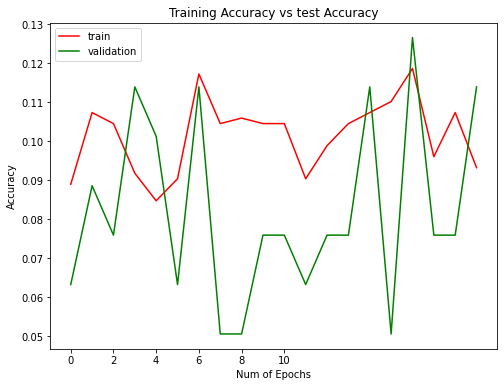

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####imagenes_3 : BORDES CON FLUJO ÓPTICO

In [0]:
def createData3():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes3/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  y = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  y.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    y.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print("X = ", X)
  print("")
  print("y = ",y)

  return X , y

In [0]:
X3 , y3  = createData3()

100% (796 of 796) |######################| Elapsed Time: 0:00:09 Time:  0:00:09


X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y =  ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdo

In [0]:
print(X.shape)
print(y.shape)
X3 = X3[:-7]
print(X3.shape)

(797, 10000)
(797,)
(789, 10000)


In [0]:
#reemplazar las 29 clases por valores del 1 al 29
y3 = np.array(y3[:789])
new_df = y3.astype('str')
new_df[new_df == "a"] = 1
new_df[new_df == "abdomen"] = 2
new_df[new_df == "able"] = 3
new_df[new_df == "about"] = 4
new_df[new_df == "above"] = 5
new_df[new_df == "accept"] = 6
new_df[new_df == "accident"] = 7
new_df[new_df == "accomplish"] = 8
new_df[new_df == "accountant"] = 9
new_df[new_df == "across"] = 10
new_df[new_df == "action"] = 11
new_df[new_df == "active"] = 12
new_df[new_df == "activity"] = 13
new_df[new_df == "actor"] = 14
new_df[new_df == "add"] = 15
new_df[new_df == "address"] = 16
new_df[new_df == "adopt"] = 17
new_df[new_df == "adult"] = 18
new_df[new_df == "advantage"] = 19
new_df[new_df == "affect"] = 20
new_df[new_df == "afraid"] = 21
new_df[new_df == "africa"] = 22
new_df[new_df == "after"] = 23
new_df[new_df == "afternoon"] = 24
new_df[new_df == "again"] = 25
new_df[new_df == "against"] = 26
new_df[new_df == "age"] = 27
new_df[new_df == "agenda"] = 28
new_df[new_df == "ago"] = 29
print(new_df)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4

In [0]:
encoded3 = to_categorical(new_df)

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, encoded3, test_size=0.1,random_state=42)

X_train2 = X_train2.reshape([-1, 100, 100, 1])
X_test2 = X_test2.reshape([-1, 100, 100, 1])

X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')

X_train2 /= 255
X_test2 /= 255

X_train2, X_test2, y_train2, y_test2 = np.array(X_train2),np.array(X_test2), np.array(y_train2), np.array(y_test2)

print('x_train shape:', X_train1.shape)
print('Number of images in x_train', X_train2.shape[0])
print('Number of images in x_test', X_test2.shape[0])
print('Number of images in y_train', y_train2.shape[0])
print('Number of images in y_test', y_test2.shape[0])

x_train shape: (708, 100, 100, 1)
Number of images in x_train 710
Number of images in x_test 79
Number of images in y_train 710
Number of images in y_test 79


In [0]:
print(y_test2.shape, X_test2.shape, y_train2.shape, X_train2.shape)

(79, 11) (79, 100, 100, 1) (710, 11) (710, 100, 100, 1)


In [0]:
SebasCNN = tf.keras.models.Sequential()                                      

SebasCNN.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(100, 100, 1))) 
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Flatten())
SebasCNN.add(tf.keras.layers.Dense(128, activation='relu'))
SebasCNN.add(tf.keras.layers.Dense(11, activation='softmax'))

SebasCNN.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 96, 96, 64)        1664      
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
SebasCNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = SebasCNN.fit(X_train2, y_train2, epochs=100, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test2, y_test2))

Epoch 1/100
23/23 [==============================] - 0s 22ms/step - loss: 2.3963 - accuracy: 0.1394 - val_loss: 2.3938 - val_accuracy: 0.1266
Epoch 2/100
23/23 [==============================] - 0s 18ms/step - loss: 2.3900 - accuracy: 0.1127 - val_loss: 2.3859 - val_accuracy: 0.1392
Epoch 3/100
23/23 [==============================] - 0s 18ms/step - loss: 2.3807 - accuracy: 0.1268 - val_loss: 2.3751 - val_accuracy: 0.1392
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 2.3684 - accuracy: 0.1268 - val_loss: 2.3616 - val_accuracy: 0.0886
Epoch 5/100
23/23 [==============================] - 0s 18ms/step - loss: 2.3542 - accuracy: 0.1056 - val_loss: 2.3490 - val_accuracy: 0.1899
Epoch 6/100
23/23 [==============================] - 0s 18ms/step - loss: 2.3364 - accuracy: 0.1408 - val_loss: 2.3404 - val_accuracy: 0.0886
Epoch 7/100
23/23 [==============================] - 0s 18ms/step - loss: 2.3250 - accuracy: 0.1042 - val_loss: 2.3276 - val_accuracy: 0.0759
Epoch 

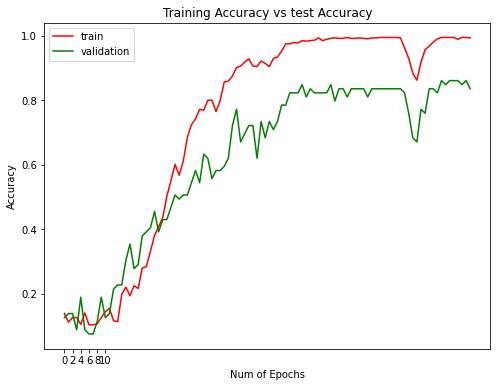

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####imagenes_4 : BORDES CON CORNER HARRIS

In [0]:
def createData4():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes4/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  y = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  y.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    y.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print("X = ", X)
  print("")
  print("y = ",y)

  
  return X , y

In [0]:
X4 , y4  = createData4()

100% (773 of 773) |######################| Elapsed Time: 0:03:20 Time:  0:03:20


X =  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]

y =  ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abd

In [0]:
print(X.shape)
print(y.shape)
X4 = X4[:-7]
print(X4.shape)

(797, 10000)
(797,)
(766, 10000)


In [0]:
#reemplazar las 29 clases por valores del 1 al 29
y4 = np.array(y4[:766])
new_df = y4.astype('str')
new_df[new_df == "a"] = 1
new_df[new_df == "abdomen"] = 2
new_df[new_df == "able"] = 3
new_df[new_df == "about"] = 4
new_df[new_df == "above"] = 5
new_df[new_df == "accept"] = 6
new_df[new_df == "accident"] = 7
new_df[new_df == "accomplish"] = 8
new_df[new_df == "accountant"] = 9
new_df[new_df == "across"] = 10
new_df[new_df == "action"] = 11
new_df[new_df == "active"] = 12
new_df[new_df == "activity"] = 13
new_df[new_df == "actor"] = 14
new_df[new_df == "add"] = 15
new_df[new_df == "address"] = 16
new_df[new_df == "adopt"] = 17
new_df[new_df == "adult"] = 18
new_df[new_df == "advantage"] = 19
new_df[new_df == "affect"] = 20
new_df[new_df == "afraid"] = 21
new_df[new_df == "africa"] = 22
new_df[new_df == "after"] = 23
new_df[new_df == "afternoon"] = 24
new_df[new_df == "again"] = 25
new_df[new_df == "against"] = 26
new_df[new_df == "age"] = 27
new_df[new_df == "agenda"] = 28
new_df[new_df == "ago"] = 29
print(new_df)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4

In [0]:
encoded4 = to_categorical(new_df)

In [0]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X4, encoded4, test_size=0.1,random_state=42)

X_train3 = X_train3.reshape([-1, 100, 100, 1])
X_test3 = X_test3.reshape([-1, 100, 100, 1])

X_train3 = X_train3.astype('float32')
X_test3 = X_test3.astype('float32')

X_train3 /= 255
X_test3 /= 255

X_train3, X_test3, y_train3, y_test3 = np.array(X_train3),np.array(X_test3), np.array(y_train3), np.array(y_test3)

print('x_train shape:', X_train3.shape)
print('Number of images in x_train', X_train3.shape[0])
print('Number of images in x_test', X_test3.shape[0])
print('Number of images in y_train', y_train3.shape[0])
print('Number of images in y_test', y_test3.shape[0])


x_train shape: (689, 100, 100, 1)
Number of images in x_train 689
Number of images in x_test 77
Number of images in y_train 689
Number of images in y_test 77


In [0]:
print(y_test3.shape, X_test3.shape, y_train3.shape, X_train3.shape)

(77, 11) (77, 100, 100, 1) (689, 11) (689, 100, 100, 1)


In [0]:
SebasCNN = tf.keras.models.Sequential()                                      

SebasCNN.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(100, 100, 1))) 
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Flatten())
SebasCNN.add(tf.keras.layers.Dense(128, activation='relu'))
SebasCNN.add(tf.keras.layers.Dense(11, activation='softmax'))

SebasCNN.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 96, 96, 64)        1664      
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
SebasCNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = SebasCNN.fit(X_train3, y_train3, epochs=20, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test3, y_test3))

Epoch 1/20
22/22 [==============================] - 0s 22ms/step - loss: 2.3658 - accuracy: 0.0900 - val_loss: 2.3397 - val_accuracy: 0.0779
Epoch 2/20
22/22 [==============================] - 0s 18ms/step - loss: 2.3187 - accuracy: 0.0943 - val_loss: 2.3239 - val_accuracy: 0.0649
Epoch 3/20
22/22 [==============================] - 0s 19ms/step - loss: 2.3107 - accuracy: 0.0943 - val_loss: 2.3225 - val_accuracy: 0.0909
Epoch 4/20
22/22 [==============================] - 0s 18ms/step - loss: 2.3102 - accuracy: 0.0900 - val_loss: 2.2958 - val_accuracy: 0.0779
Epoch 5/20
22/22 [==============================] - 0s 18ms/step - loss: 2.3089 - accuracy: 0.1045 - val_loss: 2.3057 - val_accuracy: 0.0909
Epoch 6/20
22/22 [==============================] - 0s 18ms/step - loss: 2.3155 - accuracy: 0.0914 - val_loss: 2.3260 - val_accuracy: 0.0779
Epoch 7/20
22/22 [==============================] - 0s 18ms/step - loss: 2.3063 - accuracy: 0.0987 - val_loss: 2.2918 - val_accuracy: 0.0909
Epoch 8/20
22

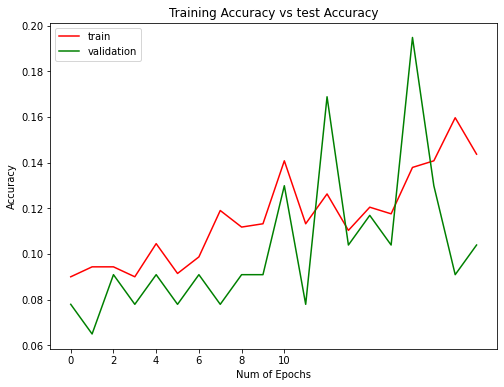

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####imagenes_5 : BACKGROUND SUBSTRACTION SIN USO DE TRESHOLD

In [0]:
def createData5():
  #Creacion de variables para importar archivos
  import progressbar, time
  import pandas as pd
  rutas_palabras = "/content/drive/My Drive/proyecto_Visión_Inteligencia/imagenes5/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  y = []

  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[0]),0), (100, 100))*1.
  X = img.reshape(100*100)
  y.append(recortarSoloNombre(nombres_palabras[0]))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    img = cv.resize(cv.imread(str(rutas_palabras+nombres_palabras[i]),0), (100, 100))*1.
    X=np.row_stack((X, img.reshape(100*100)))
    y.append(recortarSoloNombre(nombres_palabras[i]))

    total.update(i)
  total.finish()
  X=np.array(X)
  print("X = ", X)
  print("")
  print("y = ",y)

  return X , y

In [0]:
X5 , y5  = createData5()

100% (566 of 566) |######################| Elapsed Time: 0:02:22 Time:  0:02:22


X =  [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y =  ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'above', 'ac

In [0]:
#reemplazar las 29 clases por valores del 1 al 29
y5 = np.array(y5[:566])
new_df = y5.astype('str')
new_df[new_df == "a"] = 1
new_df[new_df == "abdomen"] = 2
new_df[new_df == "able"] = 3
new_df[new_df == "about"] = 4
new_df[new_df == "above"] = 5
new_df[new_df == "accept"] = 6
new_df[new_df == "accident"] = 7
new_df[new_df == "accomplish"] = 8
new_df[new_df == "accountant"] = 9
new_df[new_df == "across"] = 10
new_df[new_df == "action"] = 11
new_df[new_df == "active"] = 12
new_df[new_df == "activity"] = 13
new_df[new_df == "actor"] = 14
new_df[new_df == "add"] = 15
new_df[new_df == "address"] = 16
new_df[new_df == "adopt"] = 17
new_df[new_df == "adult"] = 18
new_df[new_df == "advantage"] = 19
new_df[new_df == "affect"] = 20
new_df[new_df == "afraid"] = 21
new_df[new_df == "africa"] = 22
new_df[new_df == "after"] = 23
new_df[new_df == "afternoon"] = 24
new_df[new_df == "again"] = 25
new_df[new_df == "against"] = 26
new_df[new_df == "age"] = 27
new_df[new_df == "agenda"] = 28
new_df[new_df == "ago"] = 29
print(new_df)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5' '5' '5' '5' '5' '5'
 '5' '5' '5' '5' '5' '5' '5' '5' '5' '6' '6' '6' '6' '6' '6' '6' '6' '6'
 '6' '6' '6' '6' '6' '6' '6' '6' '6' '6' '6' '7' '7' '7' '7' '7' '7' '7'
 '7' '7' '7' '7' '7' '7' '7' '7' '7' '7' '7' '7' '8' '8' '8' '8' '8' '8'
 '8' '8' '8' '8' '8' '8' '8' '8' '8' '8' '8' '8' '8' '8' '9' '9' '9' '9'
 '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '10' '10'
 '10' '10' '10' '10' '10' '10' '10' '10' '10' '10' '10' '10' '10' '10'
 '10' '10' '10' '10' '11' '11' '11' '11' '11' '11' '11' '11' '11' '11'
 '11' '11' '11' '11' '11' '11' '11' '11' '11' '11' '12' '12' '12' '12'
 '12' '12' '12' '12' '12' '12' '12' '12' '12' '12' '12'

In [0]:
encoded5 = to_categorical(new_df)

In [0]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X5, encoded5, test_size=0.1,random_state=42)

X_train4 = X_train4.reshape([-1, 100, 100, 1])
X_test4 = X_test4.reshape([-1, 100, 100, 1])

X_train4 = X_train4.astype('float32')
X_test4 = X_test4.astype('float32')

X_train4 /= 255
X_test4 /= 255

X_train4, X_test4, y_train4, y_test4 = np.array(X_train4),np.array(X_test4), np.array(y_train4), np.array(y_test4)

print('x_train shape:', X_train4.shape)
print('Number of images in x_train', X_train4.shape[0])
print('Number of images in x_test', X_test4.shape[0])
print('Number of images in y_train', y_train4.shape[0])
print('Number of images in y_test', y_test4.shape[0])

x_train shape: (509, 100, 100, 1)
Number of images in x_train 509
Number of images in x_test 57
Number of images in y_train 509
Number of images in y_test 57


In [0]:
print(y_test4.shape, X_test4.shape, y_train4.shape, X_train4.shape)

(57, 30) (57, 100, 100, 1) (509, 30) (509, 100, 100, 1)


In [0]:
SebasCNN = tf.keras.models.Sequential()                                      

SebasCNN.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(100, 100, 1))) 
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
SebasCNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
SebasCNN.add(tf.keras.layers.Flatten())
SebasCNN.add(tf.keras.layers.Dense(128, activation='relu'))
SebasCNN.add(tf.keras.layers.Dense(30, activation='softmax'))

SebasCNN.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 96, 96, 64)        1664      
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)             

In [0]:
SebasCNN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = SebasCNN.fit(X_train4, y_train4, epochs=30, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test4, y_test4))

Epoch 1/30
16/16 [==============================] - 0s 25ms/step - loss: 3.3775 - accuracy: 0.0825 - val_loss: 3.3408 - val_accuracy: 0.0702
Epoch 2/30
16/16 [==============================] - 0s 19ms/step - loss: 2.9843 - accuracy: 0.1473 - val_loss: 3.0887 - val_accuracy: 0.1930
Epoch 3/30
16/16 [==============================] - 0s 19ms/step - loss: 2.3850 - accuracy: 0.3301 - val_loss: 3.3254 - val_accuracy: 0.2105
Epoch 4/30
16/16 [==============================] - 0s 19ms/step - loss: 1.8555 - accuracy: 0.4519 - val_loss: 3.2528 - val_accuracy: 0.2807
Epoch 5/30
16/16 [==============================] - 0s 19ms/step - loss: 1.4865 - accuracy: 0.5521 - val_loss: 3.5610 - val_accuracy: 0.3158
Epoch 6/30
16/16 [==============================] - 0s 19ms/step - loss: 1.2094 - accuracy: 0.6483 - val_loss: 4.0747 - val_accuracy: 0.2807
Epoch 7/30
16/16 [==============================] - 0s 19ms/step - loss: 0.9446 - accuracy: 0.7053 - val_loss: 5.1416 - val_accuracy: 0.3509
Epoch 8/30
16

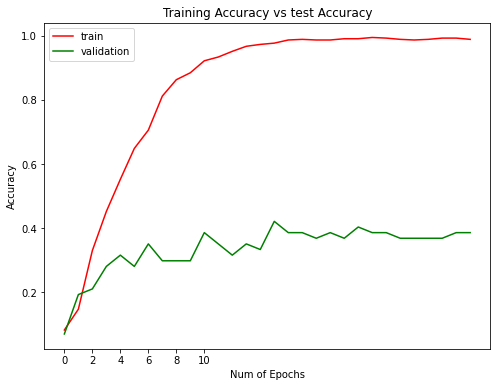

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

#### DATASET CART POLAR

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow import keras


model =  keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(
    input_shape=20, batch_size=None, dtype=None, input_tensor=None, sparse=False,
    name=None, ragged=False
))

model.add(Dense(700,activation='relu',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
#model.add(Dropout((0.3))) 

model.add(Dense(400,activation='tanh',kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(300,activation='relu',kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(100,activation='tanh',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(8,activation='softmax',kernel_initializer='he_uniform', bias_initializer='lecun_uniform'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 700)               14700     
_________________________________________________________________
batch_normalization_4 (Batch (None, 700)               2800      
_________________________________________________________________
dense_40 (Dense)             (None, 400)               280400    
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=100, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 0s 20ms/step - loss: 0.2452 - accuracy: 0.9577 - val_loss: 0.5623 - val_accuracy: 0.8800
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2696 - accuracy: 0.9532 - val_loss: 0.5860 - val_accuracy: 0.8800
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2789 - accuracy: 0.9354 - val_loss: 0.6751 - val_accuracy: 0.8867
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2838 - accuracy: 0.9443 - val_loss: 0.7226 - val_accuracy: 0.8667
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3171 - accuracy: 0.9332 - val_loss: 0.6267 - val_accuracy: 0.8933
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3035 - accuracy: 0.9488 - val_loss: 0.5955 - val_accuracy: 0.8867
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2785 - accuracy: 0.9332 - val_loss: 0.6078 - val_accuracy: 0.8800
Epoch 8/100


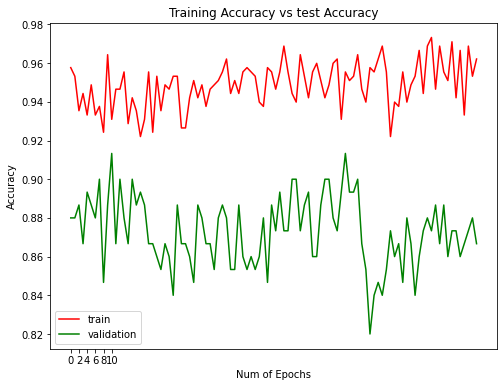

In [0]:
 plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####DATASET BOW

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow import keras


model =  keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(
    input_shape=20, batch_size=None, dtype=None, input_tensor=None, sparse=False,
    name=None, ragged=False
))

model.add(Dense(700,activation='relu',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
#model.add(Dropout((0.3))) 

model.add(Dense(400,activation='tanh',kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(300,activation='relu',kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(100,activation='tanh',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(8,activation='softmax',kernel_initializer='he_uniform', bias_initializer='lecun_uniform'))

model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 700)               14700     
_________________________________________________________________
batch_normalization_44 (Batc (None, 700)               2800      
_________________________________________________________________
dense_105 (Dense)            (None, 400)               280400    
_________________________________________________________________
batch_normalization_45 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_18 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 300)               120300    
_________________________________________________________________
batch_normalization_46 (Batc (None, 300)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=100, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test, y_test))

ValueError: ignored

In [0]:
 plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

###Redes neuronales profundas

####imagenes_1 : BACKGROUND SUBSTRACTION

In [0]:
import keras
import keras.utils
from keras import utils as np_utils
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 1]),#CAPA DE ENTRADA, QUE RECIBE LAS IMAGENES, CON EL FLATTEN VECTORIZAMOS LOS DATOS
    tf.keras.layers.Dense(564, activation=tf.nn.relu),
    tf.keras.layers.Dense(212, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_87 (Dense)             (None, 564)               5640564   
_________________________________________________________________
dense_88 (Dense)             (None, 212)               119780    
_________________________________________________________________
dense_89 (Dense)             (None, 11)                2343      
Total params: 5,762,687
Trainable params: 5,762,687
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=50, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test, y_test))

Epoch 1/50
20/20 [==============================] - 0s 8ms/step - loss: 2.1969 - accuracy: 0.2229 - val_loss: 1.9351 - val_accuracy: 0.4250
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 1.6329 - accuracy: 0.5542 - val_loss: 1.6181 - val_accuracy: 0.4688
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 1.2529 - accuracy: 0.7206 - val_loss: 1.3391 - val_accuracy: 0.6313
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.9821 - accuracy: 0.8053 - val_loss: 1.1770 - val_accuracy: 0.7125
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.8041 - accuracy: 0.8540 - val_loss: 1.0683 - val_accuracy: 0.7125
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.8917 - val_loss: 0.9694 - val_accuracy: 0.7437
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5856 - accuracy: 0.9027 - val_loss: 0.9388 - val_accuracy: 0.7312
Epoch 8/50
20/20 [==

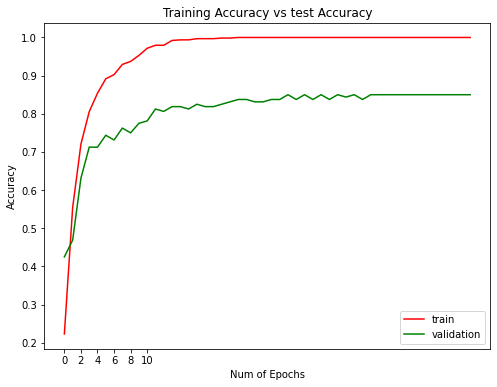

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####imagenes_2 : FLUJO ÓPTICO

In [0]:
}model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 1]),#CAPA DE ENTRADA, QUE RECIBE LAS IMAGENES, CON EL FLATTEN VECTORIZAMOS LOS DATOS
    tf.keras.layers.Dense(564, activation=tf.nn.relu),
    tf.keras.layers.Dense(212, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_42 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_93 (Dense)             (None, 564)               5640564   
_________________________________________________________________
dense_94 (Dense)             (None, 212)               119780    
_________________________________________________________________
dense_95 (Dense)             (None, 11)                2343      
Total params: 5,762,687
Trainable params: 5,762,687
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train1, y_train1, epochs=10, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test1, y_test1))

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 2.3984 - accuracy: 0.0819 - val_loss: 2.3949 - val_accuracy: 0.1266
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 2.3930 - accuracy: 0.1271 - val_loss: 2.3903 - val_accuracy: 0.0886
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 2.3877 - accuracy: 0.1483 - val_loss: 2.3861 - val_accuracy: 0.0886
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 2.3823 - accuracy: 0.1977 - val_loss: 2.3826 - val_accuracy: 0.1013
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 2.3776 - accuracy: 0.1695 - val_loss: 2.3797 - val_accuracy: 0.1266
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 2.3736 - accuracy: 0.1723 - val_loss: 2.3758 - val_accuracy: 0.1266
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 2.3691 - accuracy: 0.2218 - val_loss: 2.3723 - val_accuracy: 0.1772
Epoch 8/10
23/23 [==

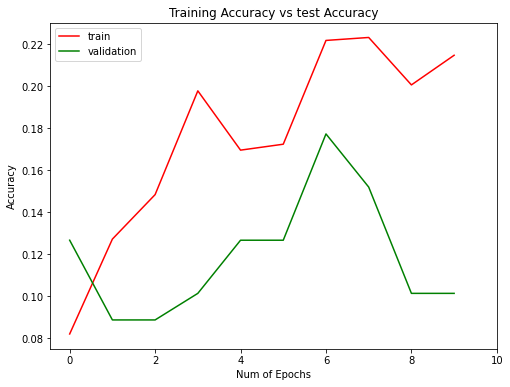

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])


####imagenes_3 : BORDES CON FLUJO ÓPTICO

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 1]),#CAPA DE ENTRADA, QUE RECIBE LAS IMAGENES, CON EL FLATTEN VECTORIZAMOS LOS DATOS
    tf.keras.layers.Dense(564, activation=tf.nn.relu),
    tf.keras.layers.Dense(212, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_102 (Dense)            (None, 564)               5640564   
_________________________________________________________________
dense_103 (Dense)            (None, 212)               119780    
_________________________________________________________________
dense_104 (Dense)            (None, 11)                2343      
Total params: 5,762,687
Trainable params: 5,762,687
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train2, y_train2, epochs=80, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test2, y_test2))

Epoch 1/80
23/23 [==============================] - 0s 8ms/step - loss: 2.3891 - accuracy: 0.0887 - val_loss: 2.3771 - val_accuracy: 0.1519
Epoch 2/80
23/23 [==============================] - 0s 4ms/step - loss: 2.3748 - accuracy: 0.1099 - val_loss: 2.3643 - val_accuracy: 0.1899
Epoch 3/80
23/23 [==============================] - 0s 4ms/step - loss: 2.3579 - accuracy: 0.1535 - val_loss: 2.3508 - val_accuracy: 0.2152
Epoch 4/80
23/23 [==============================] - 0s 4ms/step - loss: 2.3444 - accuracy: 0.1873 - val_loss: 2.3386 - val_accuracy: 0.2532
Epoch 5/80
23/23 [==============================] - 0s 4ms/step - loss: 2.3297 - accuracy: 0.2493 - val_loss: 2.3276 - val_accuracy: 0.2911
Epoch 6/80
23/23 [==============================] - 0s 4ms/step - loss: 2.3126 - accuracy: 0.3070 - val_loss: 2.3159 - val_accuracy: 0.3165
Epoch 7/80
23/23 [==============================] - 0s 4ms/step - loss: 2.2992 - accuracy: 0.3268 - val_loss: 2.3046 - val_accuracy: 0.2911
Epoch 8/80
23/23 [==

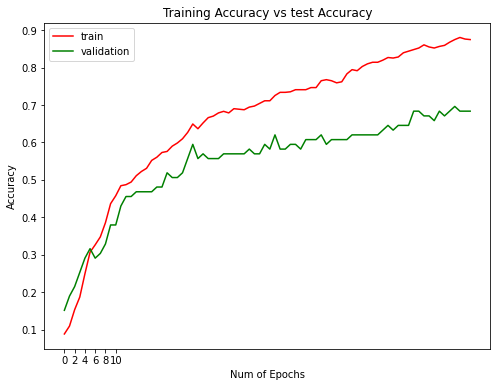

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])


####imagenes_4 : BORDES CON CORNER HARRIS

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 1]),#CAPA DE ENTRADA, QUE RECIBE LAS IMAGENES, CON EL FLATTEN VECTORIZAMOS LOS DATOS
    tf.keras.layers.Dense(564, activation=tf.nn.relu),
    tf.keras.layers.Dense(212, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_46 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_105 (Dense)            (None, 564)               5640564   
_________________________________________________________________
dense_106 (Dense)            (None, 212)               119780    
_________________________________________________________________
dense_107 (Dense)            (None, 11)                2343      
Total params: 5,762,687
Trainable params: 5,762,687
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train3, y_train3, epochs=10, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test3, y_test3))

Epoch 1/10
22/22 [==============================] - 0s 8ms/step - loss: 2.5748 - accuracy: 0.0943 - val_loss: 2.5206 - val_accuracy: 0.0649
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 2.4386 - accuracy: 0.1147 - val_loss: 2.5003 - val_accuracy: 0.0909
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 2.3809 - accuracy: 0.1205 - val_loss: 2.3119 - val_accuracy: 0.1299
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 2.3355 - accuracy: 0.1089 - val_loss: 2.3630 - val_accuracy: 0.1299
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 2.3002 - accuracy: 0.1205 - val_loss: 2.3357 - val_accuracy: 0.1039
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 2.3186 - accuracy: 0.1422 - val_loss: 2.3156 - val_accuracy: 0.1429
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 2.3192 - accuracy: 0.1350 - val_loss: 2.3431 - val_accuracy: 0.0909
Epoch 8/10
22/22 [==

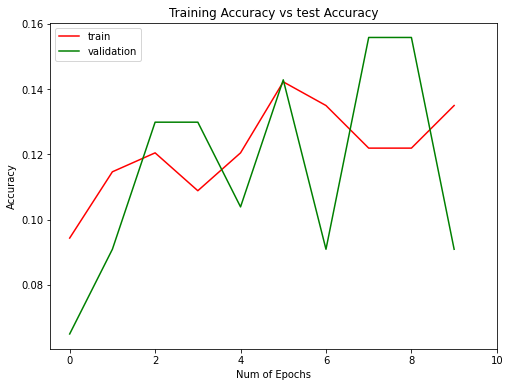

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####imagenes_5 : BACKGROUND SUBSTRACTION SIN USO DE TRESHOLD

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 1]),#CAPA DE ENTRADA, QUE RECIBE LAS IMAGENES, CON EL FLATTEN VECTORIZAMOS LOS DATOS
    tf.keras.layers.Dense(564, activation=tf.nn.relu),
    tf.keras.layers.Dense(212, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_48 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_111 (Dense)            (None, 564)               5640564   
_________________________________________________________________
dense_112 (Dense)            (None, 212)               119780    
_________________________________________________________________
dense_113 (Dense)            (None, 30)                6390      
Total params: 5,766,734
Trainable params: 5,766,734
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train4, y_train4, epochs=15, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test4, y_test4))

Epoch 1/15
16/16 [==============================] - 0s 10ms/step - loss: 3.4014 - accuracy: 0.0295 - val_loss: 3.4059 - val_accuracy: 0.0175
Epoch 2/15
16/16 [==============================] - 0s 5ms/step - loss: 3.3990 - accuracy: 0.0393 - val_loss: 3.4048 - val_accuracy: 0.0175
Epoch 3/15
16/16 [==============================] - 0s 5ms/step - loss: 3.3960 - accuracy: 0.0373 - val_loss: 3.4035 - val_accuracy: 0.0351
Epoch 4/15
16/16 [==============================] - 0s 5ms/step - loss: 3.3932 - accuracy: 0.0393 - val_loss: 3.4023 - val_accuracy: 0.0000e+00
Epoch 5/15
16/16 [==============================] - 0s 5ms/step - loss: 3.3905 - accuracy: 0.0432 - val_loss: 3.4012 - val_accuracy: 0.0000e+00
Epoch 6/15
16/16 [==============================] - 0s 5ms/step - loss: 3.3878 - accuracy: 0.0452 - val_loss: 3.3998 - val_accuracy: 0.0000e+00
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 3.3851 - accuracy: 0.0629 - val_loss: 3.3991 - val_accuracy: 0.0175
Epoch 8

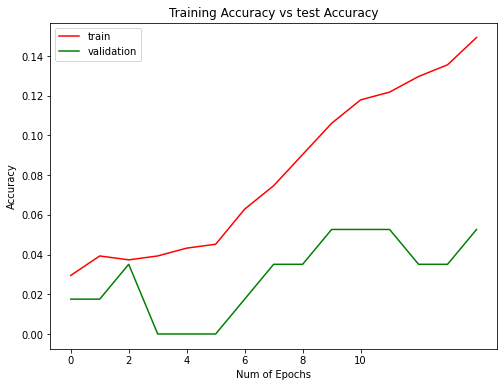

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

#### DATASET CART POLAR

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=20),                                  
    tf.keras.layers.Dense(564, activation=tf.nn.relu),
    tf.keras.layers.Dense(212, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(449, 20)
(449,)
(150, 20)
(150,)


In [0]:
history = model.fit(X_train, y_train, epochs=100, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 2.0799 - accuracy: 0.1425 - val_loss: 2.0788 - val_accuracy: 0.1533
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 2.0784 - accuracy: 0.1403 - val_loss: 2.0803 - val_accuracy: 0.0533
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 2.0794 - accuracy: 0.1292 - val_loss: 2.0811 - val_accuracy: 0.1267
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 2.0774 - accuracy: 0.1470 - val_loss: 2.0825 - val_accuracy: 0.0667
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 2.0755 - accuracy: 0.1225 - val_loss: 2.0831 - val_accuracy: 0.0667
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 2.0737 - accuracy: 0.1180 - val_loss: 2.0843 - val_accuracy: 0.0733
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 2.0790 - accuracy: 0.1470 - val_loss: 2.0856 - val_accuracy: 0.0800
Epoch 8/100


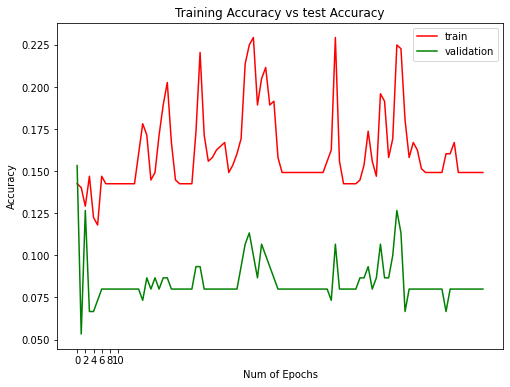

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

####DATASET BOW

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=120),                                  
    tf.keras.layers.Dense(564, activation=tf.nn.relu),
    tf.keras.layers.Dense(212, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)
])


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(719, 120)
(719,)
(80, 120)
(80,)


In [0]:
history = model.fit(X_train, y_train, epochs=15, #epoch recorridos , bash tamaño de muestra
                    validation_data=(X_test, y_test))

ValueError: ignored

In [0]:
plt.plot(history.history['accuracy'],'r')  
plt.plot(history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs test Accuracy")  
plt.legend(['train','validation'])

#**Clasificación con video realizado por nosotros**


## **HISTOGRAMAS POLARES**

###**Con la palabra ACCOMPLISH**

In [0]:
video = "/content/drive/My Drive/proyecto_Visión_Inteligencia/VideoCreado/accomplish.mp4"

V = cv.VideoCapture(video)
frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
frames = np.array(frames)


In [0]:
print(len(frames))

interact(lambda index:plt.imshow(frames[index]), 
         index = widgets.IntSlider(min=0,max=(len(frames)-1),
                                   step=1,value=0))   



46


interactive(children=(IntSlider(value=0, description='index', max=45), Output()), _dom_classes=('widget-intera…

<function __main__.<lambda>>

![texto alternativo](https://i.imgur.com/7R1nHei.gif)

In [0]:
Xtest = histo('/content/drive/My Drive/proyecto_Visión_Inteligencia/VideoCreado/accomplish.mp4')
ytest = []
ytest.append('accomplish')
ytest = np.array(ytest)
Xtest = Xtest.reshape(1, -1)

In [0]:
print(Xtest.shape)
print(ytest.shape)
print(Xtest)
print(ytest)

(1, 20)
(1,)
[[0.03148224 0.0225488  0.02688957 0.02988878 0.05566466 0.12743025
  0.02937546 0.02464948 0.02114658 0.01885413 0.04676134 0.03698138
  0.05781685 0.06954984 0.07297801 0.1347787  0.06541504 0.04926101
  0.03177984 0.02500888]]
['accomplish']


In [0]:
from sklearn.ensemble import RandomForestClassifier
neigh = RandomForestClassifier(max_depth=8)
neigh.fit(x2, y2)
#rango.append(i)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

La clase dada por nuestro mejor clasificador es acertada y con una notable precisión de 60%

In [0]:
neigh.predict(Xtest)

array(['accomplish'], dtype=object)

In [0]:
neigh.predict_proba(Xtest)

array([[0.00109297, 0.00337066, 0.093046  , 0.02047726, 0.10234718,
        0.16551928, 0.02163382, 0.59251283]])

## **RED NEURONAL**

In [0]:
%tensorflow_version 1.x
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
#cargar el archivo .csv en un pandas
data2 = ata1 = pd.read_csv("/content/drive/My Drive/proyecto_Visión_Inteligencia/datacompleto.csv", header=0, delimiter = ';')

In [0]:
#separar columna de etiquetas y columna de caracteristicas
x2 = data2.iloc[:,1:]
y2 = data2.iloc[:,0]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2, y2, random_state=0)

In [0]:
# convertir la etiquetas de string a un valor entero
y_train[ y_train == 'a'] = 0
y_train[ y_train == 'about'] = 1
y_train[ y_train == 'able'] = 2
y_train[ y_train == 'abdomen'] = 3
y_train[ y_train == 'above'] = 4
y_train[ y_train == 'accident'] = 5
y_train[ y_train == 'accept'] = 6
y_train[ y_train == 'accomplish'] = 7


y_test[ y_test == 'a'] = 0
y_test[ y_test == 'about'] = 1
y_test[ y_test == 'able'] = 2
y_test[ y_test == 'abdomen'] = 3
y_test[ y_test == 'above'] = 4
y_test[ y_test == 'accident'] = 5
y_test[ y_test == 'accept'] = 6
y_test[ y_test == 'accomplish'] = 7

In [0]:
X_test = X_test.values
X_train = X_train.values

y_train = y_train.values.astype('int32')
y_test = y_test.values.astype('int32')

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow import keras


model =  keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(
    input_shape=20, batch_size=None, dtype=None, input_tensor=None, sparse=False,
    name=None, ragged=False
))

model.add(Dense(700,activation='relu',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
#model.add(Dropout((0.2))) 

model.add(Dense(400,activation='tanh',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
#model.add(Dropout((0.2))) 

model.add(Dense(300,activation='relu',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
#model.add(Dropout((0.2))) 

model.add(Dense(100,activation='tanh',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())


model.add(Dense(8,activation='softmax',kernel_initializer='he_uniform', bias_initializer='lecun_uniform'))

model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 700)               14700     
_________________________________________________________________
batch_normalization_40 (Batc (None, 700)               2800      
_________________________________________________________________
dense_94 (Dense)             (None, 400)               280400    
_________________________________________________________________
batch_normalization_41 (Batc (None, 400)               1600      
_________________________________________________________________
dense_95 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_42 (Batc (None, 300)               1200      
_________________________________________________________________
dense_96 (Dense)             (None, 100)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = history = model.fit(X_train, y_train, epochs=120,validation_data=(X_test, y_test))

Epoch 1/120
15/15 [==============================] - 0s 20ms/step - loss: 2.2914 - accuracy: 0.2472 - val_loss: 2.1237 - val_accuracy: 0.0800
Epoch 2/120
15/15 [==============================] - 0s 8ms/step - loss: 1.2233 - accuracy: 0.6214 - val_loss: 2.1160 - val_accuracy: 0.0933
Epoch 3/120
15/15 [==============================] - 0s 8ms/step - loss: 0.8676 - accuracy: 0.7684 - val_loss: 2.1185 - val_accuracy: 0.1467
Epoch 4/120
15/15 [==============================] - 0s 8ms/step - loss: 0.7378 - accuracy: 0.8508 - val_loss: 2.1575 - val_accuracy: 0.1467
Epoch 5/120
15/15 [==============================] - 0s 9ms/step - loss: 0.6610 - accuracy: 0.8530 - val_loss: 2.2142 - val_accuracy: 0.1467
Epoch 6/120
15/15 [==============================] - 0s 9ms/step - loss: 0.5860 - accuracy: 0.8864 - val_loss: 2.2780 - val_accuracy: 0.1667
Epoch 7/120
15/15 [==============================] - 0s 9ms/step - loss: 0.5280 - accuracy: 0.8998 - val_loss: 2.3290 - val_accuracy: 0.1800
Epoch 8/120


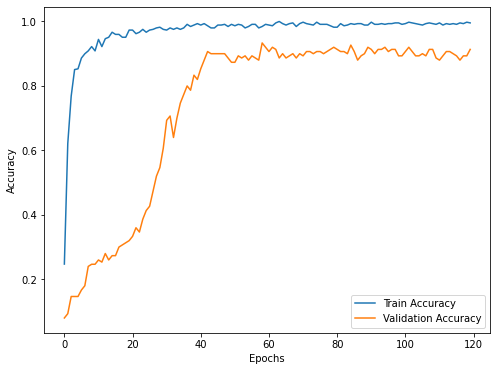

In [0]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

###**Con la palabra ACCOMPLISH**

In [0]:
Xtest = histo('/content/drive/My Drive/proyecto_Visión_Inteligencia/VideoCreado/accomplish.mp4')
ytest = []
ytest.append('accomplish')
ytest = np.array(ytest)
Xtest = Xtest.reshape(1, -1)

In [0]:
a = np.argmax(model.predict(Xtest),axis=-1)
b = a[0]
print(elimanteDuplicated(y2)[b])

accomplish


In [0]:
model.predict(Xtest)

array([[7.3256786e-05, 4.1758353e-06, 1.9178513e-02, 3.3226101e-05,
        4.9589198e-05, 4.7792503e-07, 5.8723256e-02, 9.2193753e-01]],
      dtype=float32)

###**Con la palabra a**

In [0]:
Xtest = histo('/content/drive/My Drive/proyecto_Visión_Inteligencia/VideoCreado/a2.mp4')
ytest = []
ytest.append('a')
ytest = np.array(ytest)
Xtest = Xtest.reshape(1, -1)

In [0]:
a = np.argmax(model.predict(Xtest),axis=-1)
b = a[0]
print(elimanteDuplicated(y2)[b])

about


In [0]:
model.predict(Xtest)

array([[1.3406162e-05, 2.7354308e-03, 3.7514485e-05, 9.6716410e-01,
        1.6735385e-04, 3.4269507e-04, 7.4659139e-03, 2.2073610e-02]],
      dtype=float32)

In [0]:
elimanteDuplicated(y2)

['a', 'abdomen', 'able', 'about', 'above', 'accept', 'accident', 'accomplish']

###**Con la palabra above**

In [0]:
Xtest = histo('/content/drive/My Drive/proyecto_Visión_Inteligencia/VideoCreado/above2.mp4')
ytest = []
ytest.append('a')
ytest = np.array(ytest)
Xtest = Xtest.reshape(1, -1)

In [0]:
a = np.argmax(model.predict(Xtest),axis=-1)
b = a[0]
print(elimanteDuplicated(y2)[b])

above


In [0]:
model.predict(Xtest)

array([[5.9071081e-03, 5.1228254e-04, 2.4931824e-03, 2.7466567e-05,
        8.1078875e-01, 3.5296896e-04, 1.5378226e-01, 2.6135916e-02]],
      dtype=float32)

In [0]:
elimanteDuplicated(y2)

['a', 'abdomen', 'able', 'about', 'above', 'accept', 'accident', 'accomplish']

### RED 2

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow import keras


model =  keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(
    input_shape=20, batch_size=None, dtype=None, input_tensor=None, sparse=False,
    name=None, ragged=False
))

model.add(Dense(700,activation='relu',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
#model.add(Dropout((0.3))) 

model.add(Dense(400,activation='tanh',kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(300,activation='relu',kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(100,activation='tanh',kernel_initializer='he_uniform', bias_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Dropout((0.3))) 

model.add(Dense(8,activation='softmax',kernel_initializer='he_uniform', bias_initializer='lecun_uniform'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 700)               14700     
_________________________________________________________________
batch_normalization_8 (Batch (None, 700)               2800      
_________________________________________________________________
dense_45 (Dense)             (None, 400)               280400    
_________________________________________________________________
batch_normalization_9 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)             

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = history = model.fit(X_train, y_train, epochs=280,validation_data=(X_test, y_test))

Epoch 1/280
15/15 [==============================] - 0s 20ms/step - loss: 2.7707 - accuracy: 0.1915 - val_loss: 2.0803 - val_accuracy: 0.1533
Epoch 2/280
15/15 [==============================] - 0s 8ms/step - loss: 2.2931 - accuracy: 0.2895 - val_loss: 2.0830 - val_accuracy: 0.1933
Epoch 3/280
15/15 [==============================] - 0s 8ms/step - loss: 2.0269 - accuracy: 0.3408 - val_loss: 2.0940 - val_accuracy: 0.1667
Epoch 4/280
15/15 [==============================] - 0s 9ms/step - loss: 1.7739 - accuracy: 0.3964 - val_loss: 2.1188 - val_accuracy: 0.1667
Epoch 5/280
15/15 [==============================] - 0s 7ms/step - loss: 1.6460 - accuracy: 0.4410 - val_loss: 2.1427 - val_accuracy: 0.1667
Epoch 6/280
15/15 [==============================] - 0s 7ms/step - loss: 1.4672 - accuracy: 0.4967 - val_loss: 2.1834 - val_accuracy: 0.1667
Epoch 7/280
15/15 [==============================] - 0s 7ms/step - loss: 1.5160 - accuracy: 0.4878 - val_loss: 2.2064 - val_accuracy: 0.1667
Epoch 8/280


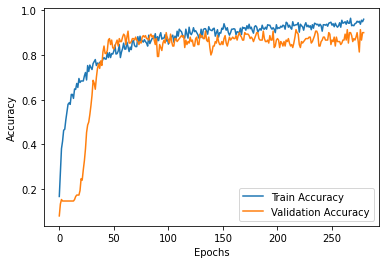

In [0]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
Xtest = histo('/content/drive/My Drive/proyecto_Visión_Inteligencia/VideoCreado/accomplish.mp4')
ytest = []
ytest.append('accomplish')
ytest = np.array(ytest)
Xtest = Xtest.reshape(1, -1)

In [0]:
a = np.argmax(model.predict(Xtest),axis=-1)
b = a[0]
print(elimanteDuplicated(y2)[b])

accomplish


In [0]:
model.predict(Xtest)

array([[7.1145118e-06, 4.6143583e-07, 1.9150634e-03, 3.6774243e-05,
        5.0191866e-05, 3.5892987e-07, 1.3696767e-01, 8.6102241e-01]],
      dtype=float32)